# <a href="https://www.youtube.com/watch?v=J56ggSnbyKY&ab_channel=BackToBackSWE">TIME, SPACE </a>

# 282. Expression Add Operators


In [9]:
def addOperators(num: str, target: int):
    res = []

    def dfs(idx = 0, path='', value=0, prev = None):
        # base case
        if value == target and idx == len(num):
            res.append(path)
            return

        # idx+1 跟 len +1 因為range 不取後面, 所以要加一才可以取道idx 真正的位置
        # 要用 idx 的原因是為了 target ex, 232 --> 取 2 +32 =35
        for i in range(idx+1, len(num)+1):
#             print(i)
            tmp = int(num[idx: i])
            if i == idx +1 or (i >idx +1 and num[idx]!="0"): # prevent "05" as 5
                if prev is None:
                    dfs(i, num[idx:i], tmp, tmp)
                else:
                    dfs(i, path+'+'+num[idx: i], value + tmp, tmp)
                    dfs(i, path+'-'+num[idx: i], value - tmp, -tmp)
                    dfs(i, path+'*'+num[idx: i], value - prev + prev*tmp, prev*tmp)
#             print(' ')
    dfs()
    return res


In [10]:
num = "105"
target = 5
addOperators(num,target)

['1*0+5', '10-5']

# 139 WordBreak

In [24]:
s = "aaaaaaa"
wordDict = ["aaa","aaaa"]

In [38]:
def wordBreak(s, word_dict):
    n = len(s)
    f = [False for i in range(n+1)]
    # KEY, f會多放一個 是因為在f[0]的位置要放一個起始條件, 但其實沒有mathc 任何word
    f[0] = True
    for i in range(n):
        if f[i]:
            for j in range(i, n):
                if s[i: j+1] in word_dict:
                    f[j+1] = True
                    print(i,j,":",f)

    return f[n]
        

In [39]:
wordBreak(s,wordDict)

0 2 : [True, False, False, True, False, False, False, False]
0 3 : [True, False, False, True, True, False, False, False]
3 5 : [True, False, False, True, True, False, True, False]
3 6 : [True, False, False, True, True, False, True, True]
4 6 : [True, False, False, True, True, False, True, True]


True

# 140 WordBreak 2

In [25]:
def wordBreak2(s ,wordDict):
    # https://www.youtube.com/watch?v=uR3RElKnrkU&ab_channel=anotherdigitalnomad

    def helper(s, wordDict, memo):
        # memo are used to store, when the rest string, how many combination can
        # be used, so don't have to calculate again
        if s in memo: return memo[s]
        if not s: return []
#         print(s)
        res = []
        for word in wordDict:
#             print('*',word)
            if not s.startswith(word):
                continue
            if len(word) == len(s):
                res.append(word)
#                 print("--res", res)
            else:
                resultOfTheRest = helper(s[len(word):], wordDict, memo)
#                 print('***',resultOfTheRest)
                for item in resultOfTheRest:
                    item = word + ' ' + item
                    res.append(item)
        memo[s] = res
        return res
    return helper(s, wordDict, {})
    

In [37]:
s = "pineapplepenapple"
wordDict = ["apple","pen","applepen","pine","pineapple"]
# s = "catsanddog"
# wordDict = ["cat","cats","and","sand","dog"]

In [38]:
wordBreak2(s, wordDict)

pineapplepenapple
* apple
* pen
* applepen
* pine
applepenapple
* apple
penapple
* apple
* pen
apple
* apple
--res ['apple']
* pen
* applepen
* pine
* pineapple
*** ['apple']
* applepen
* pine
* pineapple
*** ['pen apple']
* pen
* applepen
*** ['apple']
* pine
* pineapple
*** ['apple pen apple', 'applepen apple']
* pineapple
*** ['pen apple']


['pine apple pen apple', 'pine applepen apple', 'pineapple pen apple']

In [32]:
word = "**"
items = [i for i in range(10)]
res =[]
for item in items:
    item = word + ' ' + str(item)
    res.append(item)
    
print(res)

['** 0', '** 1', '** 2', '** 3', '** 4', '** 5', '** 6', '** 7', '** 8', '** 9']


# 212. Word search

In [6]:
from collections import defaultdict

## Build the Trie Class
class TrieNode:
    def __init__(self):
        self.children = defaultdict(TrieNode)
        self.isWord = False
        
class Trie:
    def __init__(self):
        self.root = TrieNode()
    
    def insertWord(self, word):
        node = self.root
        for w in word:
            node = node.children[w]
        node.isWord = True
    
    def getRootNode(self):
        return self.root
    

In [10]:
def findWords(board, words):
    trie = Trie()
    [trie.insertWord(w) for w in words]
    trie_root = trie.getRootNode()
    
    m = len(board)
    n = len(board[0])
    res = set()
    directions = [(0,1) , (0,-1), (1,0), (-1,0)]

    def dfs(i, j ,curr_word, curr_node):
        ch = board[i][j]
        if ch not in curr_node.children or (i,j) in visited:
            return
        if curr_node.children[ch].isWord:
            res.add(curr_word)
        
        visited.add((i,j))
        for x,y in directions:
            # KEY 要防止超出board的範圍, KEY 這邊要注意 x,y的range有包含0 不然會少找一個row
            if 0 <= x+i < m and 0 <= y+j <n:
                dfs(i+x, j+y, curr_word+board[i+x][j+y], curr_node.children[ch])
        visited.remove((i,j))
    for i in range(m):
        for j in range(n):
            visited = set()
            dfs(i,j,board[i][j], trie_root)
    return res
        

In [11]:
board = [["o","a","a","n"],["e","t","a","e"],["i","h","k","r"],["i","f","l","v"]]
words = ["oath","pea","eat","rain"]

In [12]:
findWords(board, words)

{'eat', 'oath'}

# 200 Island
*        KEY IDEA:
         單純就是 從每個island 去做DFS, 把周遭所有的island都吃掉, 並讓counter +1
         這個方法匯兌的關鍵在於, recursive, 是會在這一層的上下左右都是完,才會往上層回去
         所以不會有路斷掉德問題

In [13]:
def numIslands(grid):
    ## KEY IDEA:
    # 單純就是 從每個island 去做DFS, 把周遭所有的island都吃掉, 並讓counter +1
    # 這個方法匯兌的關鍵在於, recursive, 是會在這一層的上下左右都是完,才會往上層回去
    # 所以不會有路斷掉德問題
    if not grid:
        return 0
    count = 0

    def dfs(i, j):
        if i<0 or j <0 or i>=len(grid) or j>=len(grid[0]) or grid[i][j]!= '1':
            return

        grid[i][j]='#'
        dfs(i+1,j)
        dfs(i-1,j)            
        dfs(i,j+1)            
        dfs(i,j-1)

    for i in range(len(grid)):
        for j in range(len(grid[0])):
            if grid[i][j] == '1':
                dfs(i,j)
                count +=1
    return count



In [14]:
grid = [
  ["1","1","0","0","0"],
  ["1","1","0","0","0"],
  ["0","0","1","0","0"],
  ["0","0","0","1","1"]
]

In [15]:
numIslands(grid)

3

# <a href="https://www.youtube.com/watch?v=IV1Yx6vQSos&ab_channel=RenZhang">286 wall and gate</a>
<a href="https://github.com/ryancheunggit/leetcode"> Uesful leetcode repo</a>

0 -> gate
1 -> wall
INF -> room, fill room with nearest distance to the gate

---
邏輯是以BFS來解題, 首先找到 gate的位置(0), 所以gate的四周會是 距離他為1, 更改其rooms相對應的值, 並且將這些coordinates, 存在gates裡面(key, 只有在第一輪才會是存gate), 之後就只要去找位置存1的點, 其周遭再+1, 以此類推


In [41]:
rooms = [
    ["INF","-1","0","INF"],
    ["INF","INF","INF","-1"],
    ["INF","-1","INF","-1"],
    ["0","-1","INF","INF"],
]

In [42]:
def wallAndGates(rooms):
    if not rooms or not rooms[0]:
        return
    m, n = len(rooms),len(rooms[0])
    gates = []
    
    for r in range(m):
        for c in range(n):
            if rooms[r][c] == '0':
                gates.append((r,c))
    print(gates)
    def neighbors(r,c):
        for nr,nc in [(r-1,c), (r+1,c), (r,c-1),(r,c+1)]:
            if 0 <= nr < m and 0 <= nc < n and rooms[nr][nc] == 'INF':
                # KEY, 因為這裡是用yield, 會回傳一個generator
                # 所以在下面可以直接用 for nr,nc in neighbors(r,c
                yield(nr,nc)


    while gates:
        r, c = gates.pop(0)
        for nr,nc in neighbors(r,c):
            rooms[nr][nc] = str(int(rooms[r][c]) +1)
            print(nr,nc)
            gates.append((nr,nc))
    return rooms
        
    
        

In [39]:
def wallAndGates_test(rooms):
    if not rooms:
        return
    
    m, n = len(rooms), len(rooms[0])
    gates = []
    # find the gate location
    for r in range(m):
        for c in range(n):
            if rooms[r][c] == '0':
                gates.append((r,c))
    
    def neighbor(r,c):
        for nr, nc in [(r+1,c), (r-1, c), (r,c+1),(r,c-1)]:
            if 0 <= nr < m and 0 <= nc < n and rooms[nr][nc] == "INF":
                yield (nr,nc)
        
    
    # BFS
    while gates:
        r, c = gates.pop(0)
        # neighbor needs to filter the valid nr,nc coordinate
        for nr,nc in neighbor(r,c):
            rooms[nr][nc] = str(int(rooms[r][c]) +1)
            # append nr,nc to the rightend of the queue
            gates.append((nr,nc))
    return rooms
    
            
                

In [40]:
# wallAndGates(rooms)
wallAndGates_test(rooms)

[['3', '-1', '0', '1'],
 ['2', '2', '1', '-1'],
 ['1', '-1', '2', '-1'],
 ['0', '-1', '3', '4']]

In [30]:
rooms

[['3', '-1', '0', '1'],
 ['2', '2', '1', '-1'],
 ['1', '-1', '2', '-1'],
 ['0', '-1', '3', '4']]

# 130 Surround Regions

    Time complexity : O(MXN)
    Space complexity : O(1)

    First, check the four border of the matrix. If there is a element is
    'O', alter it and all its neighbor 'O' elements to 'N'.

    Then ,alter all the 'O' to 'X'

    At last,alter all the 'N' to 'O'


In [98]:
def solve_dfs(board):
    if not board:
        return 
    m, n = len(board), len(board[0])
    
    # KEY, DFS 是用來將跟邊緣連接的 O 換成 N
    def dfs(r,c):
        if 0 <= r< m and 0 <= c < n and board[r][c] == "O":
            board[r][c] = "N"
            # for all four direction
            [dfs(r-1, c),dfs(r+1, c),dfs(r, c-1),dfs(r, c+1)]
    
    # solve first, last row
    for c in range(n):
        dfs(0, c)
        dfs(m-1, c)
    # solve  firs, last column
    for r in range(m):
        dfs(r, 0)
        dfs(r, n-1)


    # 做完這步驟的在 board 剩下的 O 全部換成 X 
    for r in range(m):
        for c in range(n):
            if board[r][c] == "N":
                board[r][c] = "O"
            elif board[r][c] == "O":
                board[r][c] = 'X'
    return board

                

In [99]:
def solve_bfs(board):
    if not board:
        return
    m,n = len(board), len(board[0])
    queue = []
    for r in range(m):
        for c in range(n):
            # solve the "O" on edge
            if (r in [0, m-1] or c in [0, n-1]) and board[r][c] == "O":
                queue.append((r,c))
    
    while queue:
        r,c = queue.pop(0)
        if 0 <= r < m and 0 <= c < n and board[r][c] == "O":
            board[r][c] = 'N'
            queue.extend([(r-1,c), (r+1,c), (r,c-1), (r,c+1)])
    
    for r in range(m):
        for c in range(n):
            if board[r][c] == 'N':
                board[r][c] = 'O'
            elif board[r][c] == 'O':
                board[r][c] = 'X'
    return board
                

In [104]:
board = [
    ["X","X","X","X"],
    ["X","O","O","X"],
    ["X","X","O","X"],
    ["X","O","X","X"]
]
# board = [
#     ["O","O","O"],
#     ["O","O","O"],
#     ["O","O","O"]
# ]

In [105]:
solve_dfs(board)
solve_bfs(board)


[['X', 'X', 'X', 'X'],
 ['X', 'X', 'X', 'X'],
 ['X', 'X', 'X', 'X'],
 ['X', 'O', 'X', 'X']]

# <a href="https://www.youtube.com/watch?v=vWPCm69MSfs&ab_channel=HuaHua">127 Word Ladder </a>

In [113]:
# NOTE, Unoptimized solution will time expire when submitting
def ladderLength_un(beginWord, endWord, wordList):
    queue = [(beginWord, 1)]
    # KEY, each word can be used only once
    visited = set()
    
    while queue:
        word, dist = queue.pop(0)
        if word == endWord:
            return dist
        # iterate through each char in word
        for i in range(len(word)):
            for j in 'abcdefghijklmnopqrstuvwxyz':
                tmp  = word[:i] + j + word[i+1:]
                # check tmp only used once
                if tmp not in visited and tmp in wordList:
                    queue.append((tmp,dist+1))
                    visited.add(tmp)
    return 0
        

In [155]:
import string
def ladderLength(beginWord, endWord, wordList):
    words = set(wordList)
    if endWord not in words:
        return 0
    
    forward, backward, visited, r = {beginWord}, {endWord}, {beginWord}, 1
    
    def nei_gen_word(word):
        for i in range(len(word)):
            for j in string.ascii_lowercase:
                if j != word[i]: # 原本自身傳進來的word 就不用在算一次
                    yield word[:i] + j + word[i+1:]
                
                
    
    while forward and backward:
        if len(forward) > len(backward):
            forward, backward = backward, forward
        
        next_begin = set()
        for word in forward:
            for nei_word in nei_gen_word(word):
                if nei_word in backward:
                    return r+1
                if nei_word in words:
                    next_begin.add(nei_word)
                    visited.add(nei_word)
            r += 1
            forward = next_begin
    return 0
        


In [156]:
beginWord = "hit"
endWord = "cog"
wordList = ["hot","dot","dog","lot","log","cog"]

In [157]:
ladderLength(beginWord,endWord,wordList)

5

In [116]:
for i, char in enumerate(beginWord):
    print(i, char)


0 h
1 i
2 t


In [139]:
string.ascii_lowercase

'abcdefghijklmnopqrstuvwxyz'

In [145]:
s = set(wordList)

In [151]:
for ss in s:
    print(ss)

hot
log
lot
dot
cog
dog


In [150]:
'cog' in s

True

# 126 Word Ladder(return all set)

In [9]:
import string
import collections

In [44]:
def findLadders_oneway(beginWord, endWord, wordList):
    if endWord not in wordList:
        return []
    
    tree, words, n = collections.defaultdict(set), set(wordList), len(beginWord) # tree is a BFS trace for each word considered in words.
    found, q, nq = False, {beginWord}, set()# BFS uses q(queue), and nq(next queue) stores words in next level.
    
    def gen_nei_word(word):
        for i in range(len(word)):
            for c in string.ascii_lowercase:
                if c != word[i]:
                    yield word[:i] + c + word[i+1:]
        
    
    while q and not found:# BFS uses q(queue), and nq(next queue) stores words in next level.
        words -= set(q) #subtract words in current level so that they won't be used again.
        for word in q: # for each word in current level
            for nei_word in gen_nei_word(word):
                if nei_word in words:
                    if nei_word == endWord: # if found (reach the shortest solution level), we won't do next level.
                        found = True
                    else: # if not found
                        nq.add(nei_word) # prepare next queue
#                     tree[word] = nei_word
                    tree[word].add(nei_word)
        q, nq = nq, set()
#     return tree
    def bt(x):
        return [[x]] if x == endWord else [[x] + rest for y in tree[x] for rest in bt(y)]
    return bt(beginWord)
        


In [45]:
beginWord = "hit"
endWord = "cog"
wordList = ["hot","dot","dog","lot","log","cog"]


In [42]:
findLadders(beginWord,endWord, wordList)

[['hit', 'hot', 'dot', 'dog', 'cog'], ['hit', 'hot', 'lot', 'log', 'cog']]

In [52]:
def findLadders(beginWord, endWord, wordList):
    tree, words, n = collections.defaultdict(set), set(wordList), len(beginWord)
    if endWord not in wordList: return []
    found, bq, eq, nq, rev = False, {beginWord}, {endWord}, set(), False
    
    def gen_nei_word(word):
        for i in range(len(word)):
            for c in string.ascii_lowercase:
                if c != word[i]:
                    yield word[:i] + c + word[i+1:]
    
    while bq and not found:
        words -= set(bq)
        for word in bq:
            for y in gen_nei_word(word):
                if y in words:
                    if y in eq: 
                        found = True
                    else: 
                        nq.add(y)
                    tree[y].add(word) if rev else tree[word].add(y)
        bq, nq = nq, set()
        if len(bq) > len(eq): 
            bq, eq, rev = eq, bq, not rev
    def bt(x): 
        return [[x]] if x == endWord else [[x] + rest for y in tree[x] for rest in bt(y)]
    return bt(beginWord)

In [54]:
findLadders(beginWord,endWord,wordList)

[['hit', 'hot', 'dot', 'dog', 'cog'], ['hit', 'hot', 'lot', 'log', 'cog']]

# 51 N-Queens

In [70]:
def solveNQueens(n):
    # KEY: In this problem, whenever a location (x, y) is occupied, any other locations (p, q ) where p + q == x + y or p - q == x - y would be invalid. We can use this information to keep track of the indicators (xy_dif and xy_sum ) 
    #of the invalid positions and then call DFS recursively with valid positions only.
    
    #So p is a row number, and q is a column number. And as you can see we choose p as:
    # p = len(queens)
    # So it is always new one.

    # P.S. We check vertical line (same column) by q not in queens.

    def DFS(queens, xy_diff, xy_sum):
        p = len(queens) # KEY 一開始會是0, 而會遞增, 每次都會址到下一個row
        
        # base case:
        if p == n:
            res.append(queens)
            return None
        # Column
        for q in range(n):
            # KEY, queens裡面是擺, 在每個row, 第幾個column的位置
            if q not in queens and p-q not in xy_diff and p+q not in xy_sum:
                DFS(queens + [q], xy_diff + [p-q], xy_sum + [p+q])
    res = []
    DFS([],[],[])
#     return res
    return [['.'*col + "Q" + '.'*(n-col-1) for col in sol] for sol in res]
            
        
        

In [71]:
n = 4

In [72]:
solveNQueens(n)

[['.Q..', '...Q', 'Q...', '..Q.'], ['..Q.', 'Q...', '...Q', '.Q..']]

# 206 Reverse Linked list

In [73]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

In [ ]:
def reverseList(head):
    # iteritive
    prev = None
    curr = head
    
    while curr:
        next_n = curr.next
        curr.next = prev
        
        prev = curr
        curr = next_n
    return prev

In [74]:
def reverseList_recursion(head,prev=None):
    # recursion
    if not head: # BASE Case, 到最後了
        return prev
    next_n = head.next
    head.next = prev
    return reverseList_recursion(next_n, head)


# 92 Reverse Linked list 2


In [116]:
head = ListNode(1, ListNode(2,ListNode(3,ListNode(4,ListNode(5)))))

In [117]:
def reverseBetween(head, left, right):
    if left == right:
        return head
    
    pre = dummyNode = ListNode(0,head)
    
    for _ in range(left -1):
        pre = pre.next
    
    # reverse [m, n]
    reverse = None
    cur = pre.next
    
    for _ in range(right - left +1):
         cur.next, reverse, cur = reverse, cur, cur.next
    # KEY 這時候 pre.next 仍是有連到 reverse的最後一個listnode
    pre.next.next = cur
    # 把一整段reverse的最後 在家回來原本的
    pre.next = reverse
    return dummyNode.next

#     print(pre.val)
#     print(reverse.val)
#     print(cur.val)    

In [118]:
reverseBetween(head, 2,4)

In [90]:
for i in range(4 -2 +1):
    print(i)


0
1
2


# 25 ReverseNode in K-group

In [ ]:
def reverseKGroup(head, k):
    dummy = ListNode(0, head)
    groupPrev = dummy

    def getKth(curr, k):
        while curr and k> 0 :
            curr = curr.next
            k-=1
        return curr

    while True:
        kth = getKth(groupPrev, k)
        # Find the last group
        if not kth:
            break
        # Store one node after current group
        groupNext = kth.next

        # reverse group
        prev, curr = kth.next, groupPrev.next # KEY, groupPrev.next is the first node in group

        #
        while curr != groupNext:
            curr.next, prev, curr = prev, curr, curr.next

        # kth is the last node in current group, now should be beginning 
        # tmp store the original first node, now become the last node 
        tmp = groupPrev.next
        groupPrev.next = kth
        groupPrev = tmp

    return dummy.next

# 1813 Sentences Similarity III
**KEY NOTE:**
Let's break it down:

* If sentances are the same - they are similiar
* If sentences dont have common prefix or dont have common suffix - they are not similiar
* If they have common prefix and common suffix, and one of the sentances can be build by the common_prefix+common_suffix then they are similiar!**

In [1]:
sentence1 = "My name is Haley"
sentence2 = "My Haley"

In [2]:
def areSentencesSimilar(sentence1, sentence2):
    s1 = sentence1.split()
    s2 = sentence2.split()
    if len(s1) > len(s2): # let s1 be smaller, s2 be greater
        s1, s2 = s2, s1
    
    while s1:
        if s2[0] == s1[0]:
            # check whether has the same prefix
            s2.pop(0)
            s1.pop(0)
        elif s2[-1] == s1[-1]:
            # check whether has the same suffix
            s2.pop()
            s1.pop()
        else:
            return False
    
    # Because let s1 be the smaller sentences, If after while loop withouht return False
    # means one of the sentances can be build by the common_prefix+common_suffix 
    return True
    

In [3]:
areSentencesSimilar(sentence1, sentence2)

True

# 1814 Nice Pairs in Array

* Original formula nums[i] + rev(nums[j]) == nums[j] + rev(nums[i]) can be change to:
 * nums[i] - rev(nums[i]) == nums[j] - rev(nums[j])
*The problem reduces to:

    * Count the number of occurences of diffrent values for m-rev(m).
    * Find the number of options to pair them (假如有N個數字, nums[i] - rev(nums[i]) 一樣, C n 取 2 可算出total 有幾種pairs)
 
 Make a rev_nums list simply resolve the issue
Time Complexity: O(N)
Space Complexity: O(N)

In [20]:
nums = [42,11,1,97]

In [23]:
import collections
def countNicePairs(nums):
    rev_nums = [int(str(num)[::-1]) for num in nums]
    c = collections.Counter([i-j for i,j in zip(nums, rev_nums)])
    return sum([freq * freq // 2 for _, freq in c.items() if freq >1]) % int(1e9 +7)


In [24]:
countNicePairs(nums)

4

In [25]:
#  TEST
rev_nums = [int(str(num)[::-1]) for num in nums]


In [9]:
rev_nums

[24, 11, 1, 79]

In [11]:
list(zip(nums, rev_nums))

[(42, 24), (11, 11), (1, 1), (97, 79)]

In [12]:
[i-j for i,j in zip(nums, rev_nums)]

[18, 0, 0, 18]

In [14]:
C.items()

dict_items([(18, 2), (0, 2)])

In [16]:
[freq * (freq-1) // 2 for _, freq in C.items() if freq > 1]

[1, 1]

In [18]:
10//2

5

1000000007.0

# 24 Swap node in pairs

In [1]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

In [2]:
class Solution:
    def swapPairs(self, head: ListNode) -> ListNode:
        # pre -> a -> b -> b.next
        # to 
        # pre -> b -> a -> b.next
        
        dummy = pre = ListNode(0)
        # link the original listNode
        pre.next = head
        
        while pre.next and pre.next.next: # need to ensure there are two elements left to swap
            a = pre.next
            b = a.next
            pre.next, a.next, b.next = b, b.next, a
            
            # key: pre 這邊直接換成a, 所以已經越過b了
            pre = a
        
        return dummy.next
        

# 328 Odd Even Linked List

In [3]:
def oddEvenList(self, head: ListNode) -> ListNode:
    dummy1 = odd = ListNode(0)
    dummy2 = even = ListNode(0)

    # KEY: First node consider odd
    while head:
        odd.next = head
        even.next = head.next
        odd = odd.next
        even = even.next
        head = head.next.next if even else None
    # At last need to connect two list
    odd.next = dummy2.next

    return dummy1.next

# 83 Remove Duplicate in LinkedLIst

In [6]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

In [11]:
def deleteDuplicates( head: ListNode) -> ListNode:
    curr = head

    while curr and curr.next:
        if curr.val == curr.next.val:
            curr.next = curr.next.next
        else:
            curr = curr.next
    return head

In [26]:
Test_list = ListNode(1,ListNode(1,ListNode(1,ListNode(2,(ListNode(2,(ListNode(3))))))))

In [27]:
# ans = deleteDuplicates(Test_list)
ans = Test_list

In [24]:
while ans:
    print(ans.val)
    ans = ans.next

1
1
1
2
2
3


# 82 Remove ALL Duplicate in LinkedLIst

In [21]:
def deleteDuplicates_2( head: ListNode) -> ListNode:
    # KEY, Need to start another list, because if the duplicare at the beginning 
    # Need to wipe out the original list info, so need to start a new list
    dummy = pre = ListNode(0)
    dummy.next = head
    
    while head and head.next:
        if head.val == head.next.val:
            while head.next and head.val == head.next.val:
                 # loop until head point to the last duplicates
                head = head.next
            # KEY, now head point to the different value
            head = head.next
            # Because all duplicate num need to remove so, need extra next
            pre.next = head
        else:
            pre = pre.next
            head= head.next
    return dummy.next

In [29]:
ans = deleteDuplicates_2(Test_list)

In [30]:
while ans:
    print(ans.val)
    ans = ans.next

3


# 62 Unique Paths

## KEY to DP, WHAT IS THE SUB PROBLEM

KEY IDEA: 因為只能往右或往下走一步, 所以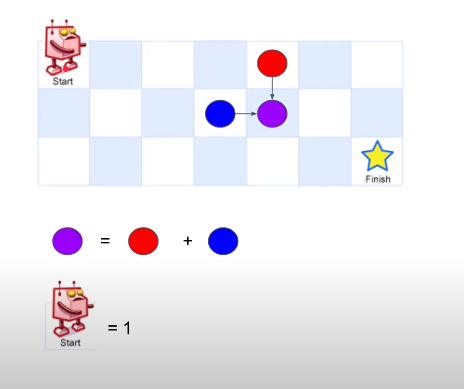 每個點的直衣錠是從上或左而來的 所以 previous grids is dp[i-1][j] + dp[i][j-1]

In [32]:
def uniquePaths_mn(m, n):
    dp = [[1]*n for _ in range(m)]
    # KEY, 起始位置是1, 所以 loop 要從 (1, m)
    # SPACE O(m*n)
    for i in range(1,m):
        for j in range(1,n):
            dp[i][j] = dp[i-1][j] + dp[i][j-1]  # i-1 --> 上, j-1 --> 左
#     return dp[m-1][n-1]
    return dp[-1][-1]

In [44]:
def uniquePaths(m, n):
    #SPACE O(n)
    # https://www.youtube.com/watch?v=fEcyKrdIkho&ab_channel=KhushbooGoel
    # 沒有必要把整個 m*n 的資料都存起來, 可以每次在存的時候只要存colum的資料
    # 下一個iteration 只要把左邊的質加起來就可以
    dp = [1] * n
    for i in range(1,m):
        for j in range(1,n):
            dp[j] += dp[j-1]
    return dp[-1]


In [45]:
m = 3
n = 7

In [46]:
l = [[1] * n for _ in range(m)]

In [47]:
uniquePaths(m,n)

[1, 3, 6, 10, 15, 21, 28]

# 63 Unique Paths II (with obstacles)

In [72]:
# obstacleGrid = [[0,0,0],[0,1,0],[0,0,0]]
# obstacleGrid = [[1,0],[0,0]]
obstacleGrid = [[0,0],[1,1],[0,0]]

In [53]:
dp = [[1 if c ==0 else -9  for c in row] for row in obstacleGrid]

In [75]:
def uniquePathsWithObstacles(obstacleGrid):
    m = obstacleGrid
    if not m or m == [[]] or len(m)==0 or m[0][0] == 1:
        return 0
    
    m[0][0] = 1

    #KEY, 不能單純把所有0 -> 1, 要考慮到 石頭把路都封死的狀況, 
    # 所以 top row, 跟 left most col 需要另外處理
    # dp = [[1 if c == 0 else 0  for c in row] for row in obstacleGrid]    
    
    # top row
    for i in range(1, len(m[0])):
        if m[0][i] == 1: # rock
            m[0][i] = 0
        else:
            m[0][i] = m[0][i-1]
    
    # left most col
    for i in range(1, len(m)):
        if m[i][0] == 1:
            m[i][0] = 0
        else:
            m[i][0] = m[i-1][0]
    
    # rest of the grid
    
    for i in range(1,len(m)):
        for j in range(1,len(n)):
            if m[i][j] == 1:
                m[i][j] = 0
            else:
                m[i][j] = m[i-1][j] + m[i][j-1]
    return m[-1][-1]

In [76]:
uniquePathsWithObstacles(obstacleGrid)

0

# <a href='https://www.youtube.com/watch?v=2MmGzdiKR9Y&ab_channel=BackToBackSWE'>53 Maximum Subarray</a>

In [137]:
nums = [-2,1,-3,4,-1,2,1,-5,4]
# nums = [5,4,-1,7,8]
# nums = [-2,1]

In [141]:
def maxSubArray_nonDP(nums):
    # O(n*2)
    max_value = float('-inf')
    for i in range(len(nums)):
        tmp = nums[i]
#         l= []
        for j in range(i, len(nums)):
            if j != i:
                tmp += nums[j]
#             l.append(tmp)
#             print(tmp, max_value)
            if tmp > max_value:
                max_value = tmp
#         print(l)
    return max_value
            

In [142]:
maxSubArray_nonDP(nums)

6

KEY: 在每個node 都要決定是要從自己新開始, 還是要延續前面的array 也就是 max(i ,subarray[i-1])
再往前一步延伸, 其實只要之前的sub

In [157]:
def maxSubArray(nums):
    # Time O(n)
    # SPACE O(n)
#     sub = [0]*len(nums)
#     sub[0] = nums[0]
#     # sub 代表的是 subarray 在 每個位置結束的時候, 最大的值
#     for i in range(1,len(nums)):
#         sub[i] = max(nums[i], sub[i-1] + nums[i])
        
#     # 再從所有位置中 取最大的
#     return max(sub)

    #Time O(n)
    #SPACE O(1)
    newNum= maxTotal = nums[0]
    # 每次只存一個位置, 跟overall max 比較
    for i in range(1,len(nums)):
        newNum = max(nums[i], nums[i] + newNum)
        maxTotal = max(newNum, maxTotal)
    return maxTotal
    
    
        
    
    

In [158]:
maxSubArray(nums)

6

# 203 Remove Linked List Elements

In [1]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

In [122]:
# Test_list = ListNode(1,ListNode(2,ListNode(3,ListNode(6,(ListNode(7,(ListNode(4))))))))
Test_list = ListNode(7,ListNode(7,ListNode(7,ListNode(6,(ListNode(7,(ListNode(7))))))))

In [123]:
def removeElements_Original_V(head, val):
    dummy = d_head =ListNode(0)
    node = head
    while node :
        while node and node.val == val:
            node = node.next
        d_head.next = node
        d_head = d_head.next
        if node:
            node = node.next

    return dummy.next
    

In [124]:
def removeElements(head, val):
    dummy = dummy_head = ListNode(0)
    # Linked to original head
    dummy_head.next = head
    
    while dummy_head.next:
        if dummy_head.next.val == val:
            # KEY only change dummy_head.next
            # dummy_head still remain
            dummy_head.next = dummy_head.next.next
        else:
            # now dummy_head.next is pointed to non-traget value
            # change dummy_head to its next
            dummy_head = dummy_head.next
    return dummy.next


In [125]:
ans = removeElements(Test_list, 7)

In [126]:
while ans:
    print(ans.val)
    ans = ans.next

6


# <a href ="https://www.youtube.com/watch?v=OM1MTokvxs4&ab_channel=NeetCode">120 Triangle</a>

In [19]:
triangle = [[2],[3,4],[6,5,7],[4,1,8,3]]

In [20]:
def minimumTotal(triangle):
    # Bottom up, DP solution
    r = len(triangle) -2

    for row in range(r,-1,-1):
#         print(triangle[row])
        for i in range(len(triangle[row])):
            triangle[row][i] =  triangle[row][i] + min(triangle[row+1][i], triangle[row+1][i+1])
    print(triangle)
    return triangle[0][0]

    
    
    
    

In [21]:
minimumTotal(triangle)

[6, 5, 7]
[3, 4]
[2]
[[11], [9, 10], [7, 6, 10], [4, 1, 8, 3]]


# 279 Perfect Squares

In [24]:
def numSquare(n):
    # initialize dp array
    # dp 是存 在 i 這個數字, 有幾個square可相加得到這個值(i)
    dp = [i for i in range(n+1)]
    
    for i in range(2, n+1):
        for j in range(1, int(i**0.5)+1):
            # KEY, 在每個數字i, 都要去試到所有自己開根號小的數字
            # 去比 如果減掉這個 j*j, dp[i- j*j] +1 (加一步是多j 這部)
            dp[i] = min(dp[i], dp[i-j*j]+1)
    print(dp)
    return dp[-1]
        

In [26]:
numSquare(100)

[0, 1, 2, 3, 1, 2, 3, 4, 2, 1, 2, 3, 3, 2, 3, 4, 1, 2, 2, 3, 2, 3, 3, 4, 3, 1, 2, 3, 4, 2, 3, 4, 2, 3, 2, 3, 1, 2, 3, 4, 2, 2, 3, 3, 3, 2, 3, 4, 3, 1, 2, 3, 2, 2, 3, 4, 3, 3, 2, 3, 4, 2, 3, 4, 1, 2, 3, 3, 2, 3, 3, 4, 2, 2, 2, 3, 3, 3, 3, 4, 2, 1, 2, 3, 3, 2, 3, 4, 3, 2, 2, 3, 4, 3, 3, 4, 3, 2, 2, 3, 1]


1

# 16 3Sum Closest

In [29]:
 def threeSumClosest(nums, target):
        if not nums:
            return None
        
        nums = sorted(nums)
        diff = float('inf')
        
        for i in range(len(nums)-2):
            p1= i+1
            p2= len(nums)-1
            
            while p1<p2:
                s = nums[i] + nums[p1] + nums[p2]
                if abs(s-target) < diff:
                    diff = abs(s-target)
                    output = s
                
                if s<target:
                    p1+=1
                elif s>target:
                    p2-=1
                else:
                    return target
        return output
            
    

In [30]:
threeSumClosest(nums = [-1,2,1,-4], target = 1)

2

# <a href="https://www.youtube.com/watch?v=jgiZlGzXMBw&ab_channel=BackToBackSWE">322  Coin Change </a>

In [72]:
coins = [186,419,83,408]
amount = 6249
# coins = [1,2,5]
# amount = 11

DP 的關鍵在找到subproblem, 要如何跟target產生關聯, (大部分都要有array,dict,來存之前之值)  
假如 今天的amount 是 11,coins 有 1,2,5  
如果今天知道amount 是 9的時候, 可以直接+2 來得到答案  
同理, amount = 6 (+5), amount = 10 (+1)  
當今天剩餘的值可以由coin 來組成時, 就要記錄可能的最小值是多少  


In [73]:
def coinChange(coins, amount):
    # Create place holder for amount +1(including 0)
    dp = [amount +1] * (amount+1)
    dp[0] = 0
    
    # iterate through each slot in dp
    # Each slot represent the min coinst to add up to this value
    for i in range(len(dp)):
#         print(i)
        for c in coins:
            # IF the remaining value is less than coin, than try to compare
            if i>=c:
                # Compare, whether form last step is more optimal
                dp[i] = min(dp[i-c]+1, dp[i])
    # If last slot equal amount +1, means such value cannot be composed of these coins
    if dp[-1] == amount +1:
        return -1
    return dp[-1]
                
    
    

In [74]:
coinChange(coins, amount)

20

In [79]:
def coinChange_WRONG(coins, amount):
    # 這個寫法錯在, 不能確定每次都選最大的值
    if amount == 0 :
        return 0
    count = 0
    
    while amount > 0:
        print(coins, amount)
        coins = [c if c <= amount else -1 for c in coins]
        print(coins)
        if max(coins)<0:
            break
        amount -= max(coins)
        count +=1
    
    if amount == 0:
        return count
    else:
        return -1
        
    
#     print()

In [99]:
# coinChange(coins, amount)

# 377  Combination Sum IV  
Given an array of distinct integers nums and a target integer target, return the number of possible combinations that add up to target.**Note that different sequences are counted as different combinations.**  
target = 11, nums = [1,2,5]:  
target(10) + target(9) + target(6)


In [102]:
nums = [1,2,3]
target = 4

In [105]:
def combinationSum4(nums, target):
    dp = [0] * (target +1 )
    
    # iterate through each slot
    for i in range(len(dp)):
        for num in nums:
            if i == num:
                # When slot 2, happens has coin 2, 
                # 這邊加的1 是代表 直接一個coin 到位的值
                dp[i] +=1 
            
            if num < i :
                # KEY, 這邊要是 另外一個if
                # 上述的例子, T(11) 要把 T(9),T(10),T(6)的值 加起來
                # 如果根本走不到 就會是+=0
                dp[i] += dp[i-num]
    # default =0, 走不到就是0
    return dp
        
    
    
    

In [106]:
combinationSum4(nums, target)

[0, 1, 2, 4, 7]

# <a href="https://www.youtube.com/watch?v=PCC6Tshwxbo&ab_channel=%E5%B1%B1%E6%99%AF%E5%9F%8E%E4%B8%80%E5%A7%90">256 Paint House</a>
ONLY 3 COLORS  
Have to paint all the houses that **no two adjacent houses have the same color**  
Also need to find the min cost to paint all houses
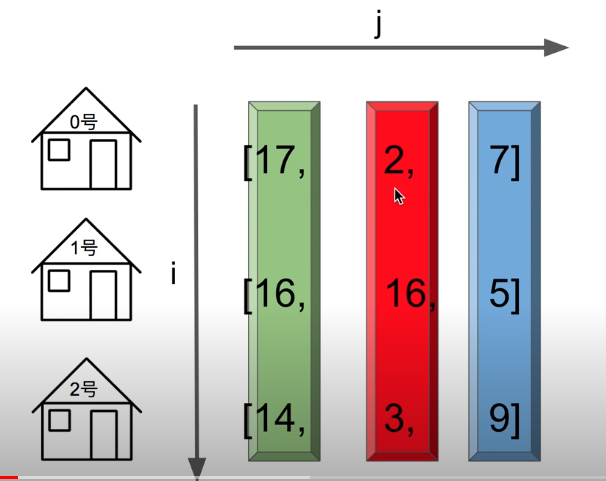


In [150]:
cost = [[17,2,7] , [16,16,5], [14,3,9]]

In [151]:
def minCost(cost):
    if not cost:
        return 0
    
    for i in range(1,len(cost)):
        # 把每一個slot 的值, 都更新成, 如果選了其中一個顏色 **加上** 前一個row 的optimal值
        # i row, 選綠色, i-1 row 就要挑紅或藍 哪個可以 min cost
        cost[i][0] += min(cost[i-1][1], cost[i-1][2])
        # 選紅
        cost[i][1] += min(cost[i-1][0], cost[i-1][2])        
        # 選藍
        cost[i][2] += min(cost[i-1][1], cost[i-1][0])
        
    return cost
    return min(cost[-1])

In [152]:
minCost(cost)

[[17, 2, 7], [18, 23, 7], [21, 10, 27]]

# <a href="https://www.youtube.com/watch?v=KVfQmGiwEMU&ab_channel=HuifengGuan">265 Paint House II</a>
**HAS K COLORS**  
No TWO adjacent houses has the same color  
find minum cost  



In [153]:
cost = [[17,2,7] , [16,16,5], [14,3,9]]

In [154]:
def minCost_II(cost):
    if not cost:
        return 0

    for i in range(1,len(cost)):
#         print(i,' row')
        for j in range(len(cost[i])):
#             print(cost[i-1][:j] + cost[i-1][j+1:])
#             print(min(cost[i-1][:j] + cost[i-1][j+1:]))
            cost[i][j] += min(cost[i-1][:j] + cost[i-1][j+1:])
    return cost
    return min(cost[-1])


In [155]:
minCost_II(cost)

[[17, 2, 7], [18, 23, 7], [21, 10, 27]]

# <a href='https://www.youtube.com/watch?v=7TnjypshYNU&t=118s&ab_channel=HappyCoding'>375 Guess higher or lower</a>  
<a href="https://leetcode.com/problems/guess-number-higher-or-lower-ii/discuss/699749/Python-Very-detailed-explanation-with-examples">SOL</a>
Still little confuesd

In [168]:
def getMoneyAmount(n):
    dp = [[float('inf')] * (n+1) for _ in range(n+1) ]
    
    for i in range(n, 0, -1):
        # i 代表, 答案是第i的時候
#         print(i)
        for j in range(i, n+1):
            # 猜j 會需要多少 cost
#             print('*',j)            
            if i == j:
                # i == j, means guess correct, so, cost 0
                dp[i][j] = 0
            if j - i == 1:
                # 假設 i = 5, j =6
                dp[i][j] = i
            for k in range(i+1, j):
#                 print('--',k)
#                 dp[i][j] = min( dp[i][j], max(dp[i][k-1]+k, dp[k+1][j]+k))
                dp[i][j] = min( dp[i][j], max( dp[i][k-1] + k, dp[k+1][j] + k ) )
#     return dp
    return dp[1][-1]


In [169]:
getMoneyAmount(10)

16

# 64 Minimum Path Sum

In [211]:
# grid = [[1,3,1],[1,5,1],[4,2,1]]
grid = [[1,2,3],[4,5,6]]

In [212]:
def minPathSum(grid):
    #deal edge case
    # 1st row
    for col in range(1,len(grid[0])):
        grid[0][col] += grid[0][col-1]
    # 1st col
    for row in range(1,len(grid)):
        grid[row][0] += grid[row-1][0]
    
    # row
    for i in range(1,len(grid)):
        # col
        for j in range(1,len(grid[0])):
            l_row = grid[i-1][j] if i-1 >=0 else 0
            l_col = grid[i][j-1] if j-1 >=0 else 0
            
#             print('*',grid[i][j])
#             print(l_row, l_col)
            grid[i][j] += min(l_row , l_col) 
#             print('-',grid[i][j])
            
            
            
            
    return grid

In [213]:
minPathSum(grid)

[[1, 3, 6], [5, 8, 12]]

# 15 3SUM

In [1]:
nums = [-1,0,1,2,-1,-4]

In [38]:
def threeSum(nums):
    res = []
    nums = sorted(nums)
    
    # because choose 3sum, the last can access is len(nums-2)
    for i in range(len(nums)-2):
        if i>0 and nums[i] == nums[i-1]:
            # NO duplicate can be used
            continue
        left_pointer, right_pointer = i+1, len(nums)-1
#         print(nums)
        while left_pointer < right_pointer:
            s = nums[i] + nums[left_pointer] + nums[right_pointer]
#             print(nums[i] , nums[left_pointer] , nums[right_pointer])
            if s<0:
                left_pointer +=1
            elif s>0:
                right_pointer -=1
            else:
                # s == 0, means find the sol
                res.append([nums[i], nums[left_pointer], nums[right_pointer]])
#                 print([nums[i], nums[left_pointer], nums[right_pointer]])
                
                
                # KEY, 要把所有的可能都 try 完
                # [-4, -1, -1, 0, 1, 2]
                # -1,-1,2 . -1,0,1. Start 都是從-1開始, 所以不能直接break 要試到不一樣的職
                while left_pointer < right_pointer and nums[left_pointer] == nums[left_pointer+1]:
                    left_pointer +=1
                while left_pointer < right_pointer and nums[right_pointer] == nums[right_pointer-1]:
                    right_pointer -=1
                left_pointer += 1
                right_pointer -= 1
#                 print('**',[nums[i], nums[left_pointer], nums[right_pointer]])
                
    return res
        

In [39]:
threeSum(nums)

[[-1, -1, 2], [-1, 0, 1]]

In [31]:
l=[]

In [34]:
l.append((1,2,3))

In [35]:
l

[(1, 2, 3), (1, 2, 3)]

# <a href='https://leetcode.com/problems/dungeon-game/discuss/698961/Python-Simple-in-place-DP-solution-O(1)-space'>174 Dungeon</a>  
屌解法:
跟之前題目不同, 直接從最右下, 看最後需要多少hp, 才回推    
The first step is to calculate how much hp is required to save the princess upon reaching dungeon[m-1][n-1]:  
dungeon[i][j] = min(dungeon[i][j], 0) * -1 + 1  
For example:  
If dungeon[m-1][n-1] == -5, then we need 6 hp.  
If dungeon[m-1][n-1] >= 0 then we only need 1 hp.  

  We subtract this minimum hp from the current cell's value to find how much hp would be needed to reach the princess from the current cell.
If this value is <=0, we change it to 1 because that means there is an abundance of hp in this cell and our minimum hp can never be <=0.

In [45]:
dungeon = [[-2,-3,3],[-5,-10,1],[10,30,-5]]

In [46]:
def calculateMinimumHp(dungeon):
    m, n = len(dungeon), len(dungeon[0])
    
#     dungeon[m-1][n-1] = min(dungeon[m-1][n-1], 0) * -1 + 1
    for i in range(m-1, -1, -1):
        for j in range(n-1, -1 ,-1):
            if i == (m-1) and j == (n-1):
                dungeon[i][j] = min(dungeon[i][j], 0) * -1 + 1
            elif i == m-1:
                # deal with last row:
                # KEY, 這邊[i][j+1] 會先做過 已經是 '剩餘所需HP', [i][j] 會是這個所需的HP
                # 如果 [i][j] < 0, 減去之後會使 '剩餘所需HP' 上升, vice versa
                # 減掉 [i][j]後 ('每部所消耗'), 如果<0, 代表 '走完這步剩餘所需的HP 小於0', 代表還有餘裕, 因此直接設1 即可
                dungeon[i][j] = max(dungeon[i][j+1] - dungeon[i][j], 1)
            elif j == n-1:
                # deal with last col:
                dungeon[i][j] = max(dungeon[i+1][j] - dungeon[i][j], 1)
            else:
                # deal with the rest
                # 這裡外層的 max 邏輯一樣, 如果所需剩餘的HP <0 ,直接給1
                # 裡面 min的作用, 是 "選取 所需HP 較少的道路"s
                dungeon[i][j] = max(min(dungeon[i+1][j],dungeon[i][j+1])-dungeon[i][j] ,1)
    # After processing dungeon 存的值變成, 從這個點, 走道 bottom right 所需的 HP是多少
    return dungeon
                
    
    

In [47]:
calculateMinimumHp(dungeon)

[[7, 5, 2], [6, 11, 5], [1, 1, 6]]

# <a href="https://leetcode.com/problems/maximal-square/discuss/600149/Python-Thinking-Process-Diagrams-DP-Approach">221 Maximal Square  </a>
Given an m x n binary matrix filled with 0's and 1's, find the largest square containing only 1's and return its area.


In [60]:
matrix = [["1","0","1","0","0"],["1","0","1","1","1"],["1","1","1","1","1"],["1","0","0","1","0"]]


In [63]:
def maximalSquare(matrix):
    if not matrix or len(matrix) < 1:
        return 0
    rows = len(matrix)
    cols = len(matrix[0])
    max_side = 0
    # extra space
    dp = [[0] * (cols+1) for _ in range(rows+1)]
#     for l in matrix:
#         print(l)
    for r in range(rows):
        for c in range(cols):
            if matrix[r][c] == '1':
                dp[r+1][c+1] = min(dp[r][c],dp[r+1][c],dp[r][c+1]) + 1
#                 matrix[r+1][c+1] = min(int(matrix[r][c]),int(matrix[r+1][c]),int(matrix[r][c+1])) +1
#                 max_side = max(max_side, matrix[r+1][c+1])
                max_side = max(max_side, dp[r+1][c+1])
#     print(" ")
#     for l in dp:
#         print(l)
    return max_side * max_side



In [64]:
maximalSquare(matrix)


['1', '0', '1', '0', '0']
['1', '0', '1', '1', '1']
['1', '1', '1', '1', '1']
['1', '0', '0', '1', '0']
 
[0, 0, 0, 0, 0, 0]
[0, 1, 0, 1, 0, 0]
[0, 1, 0, 1, 1, 1]
[0, 1, 1, 1, 2, 2]
[0, 1, 0, 0, 1, 0]


4

# 887 Super Egg Drop

In [66]:
k = 3; n=14

In [69]:
def superEggDrop_NON_BINARY(k, n):

    memo = dict()

    def dp(k, n):
        # base case
        if k == 1: return n
        if n == 0: return 0

        if (k,n) in memo:
            return memo[(k,n)]

        res = float('inf')

        # i 是測試第幾層樓
        for i in range(1, n+1):
            res = min(res,
                      max(
                          dp(k, n-i), # 沒碎
                          dp(k-1, i-1) # 碎
                      ) +1 
                     )
        memo[(k,n)] = res
        return res
    return dp(k,n)


In [70]:
def superEggDrop_BIN(k, n):
    memo = dict()
    def dp(K, N):
        if K == 1: return N
        if N == 0: return 0
        if (K, N) in memo:
            return memo[(K, N)]
        
        res = float('inf')
        lo, hi = 1, N
        while lo <= hi:
            mid = (lo + hi) //2
            broken = dp(K-1, mid -1)
            not_broken = dp(K, N - mid)
            if broken > not_broken:
                hi = mid - 1
                res = min(res, broken + 1)
            else:
                lo = mid + 1
                res = min(res, not_broken + 1)

        memo[(K, N)] = res
        return res
    return dp(k,n)
            

In [71]:
superEggDrop(k,n)

4

# <a href="https://github.com/labuladong/fucking-algorithm/blob/master/%E5%8A%A8%E6%80%81%E8%A7%84%E5%88%92%E7%B3%BB%E5%88%97/%E5%9B%A2%E7%81%AD%E8%82%A1%E7%A5%A8%E9%97%AE%E9%A2%98.md"> Stock Series Poblem</a>

## 121 Best Time to Buy and Sell Stock
You want to maximize your profit by choosing a single day to buy one stock and choosing a different day in the future to sell that stock.

In [3]:
 prices = [7,1,5,3,6,4]

In [4]:
def maxProfit(prices):
    max_profit, min_price = 0, float('inf')

    for price in prices:
        min_price = min(min_price, price)
        max_profit = max(max_profit, price - min_price)
    return max_profit

In [11]:
def maxProfit(prices):
    dp = [[0] * 2 for _ in range(len(prices))]
    
    # dp 存的是每天 每種狀態下的利潤
    dp[0][0] = 0
    # 第0天 就買 股票, 所以需要付錢
    dp[0][1] = -prices[0]
    for i in range(1, len(prices)):
                        # 昨天就沒股票, or, 昨天有今天賣
        dp[i][0] = max(dp[i-1][0], dp[i-1][1] + prices[i])
                        # KEY, 因為此題只能買賣各一次, 身上有股票的狀態, 除了從昨天就擁有之外
                        # 一定是要用 0 去買今天股票的錢, 不能是昨天沒有買股票的狀態
        dp[i][1] = max(dp[i-1][1], 0 - prices[i])
    
#     # Space (1)
#     dp_i_0 = 0
#     dp_i-1 = -prices[0]
#     for i in range(1, len(prices)):
#         dp_i_0 = max(dp_i_0, dp_i_1 + prices[i])
#         dP_i_1 = max(dp_i_1, 0 - prices[i])
#     return dp_i_0
    
    # 最後一天, 股票賣掉的最大利潤
    return dp[-1][0]
        

In [12]:
 maxProfit(prices)

[[0, -7], [0, -1], [4, -1], [4, -1], [5, -1], [5, -1]]

## 122 Best Time to Buy and Sell Stock II
Find the maximum profit you can achieve. **You may complete as many transactions as you like**

In [28]:
prices = [7,1,5,3,6,4]

In [29]:
def maxProfit(prices):
    dp = [[0] * 2 for _ in range(len(prices))]
    dp[0][0] = 0
    dp[0][1] = -prices[0]
    
    for i in range(1, len(prices)):
#         tmp = dp[i-1][0]
        dp[i][0] = max(dp[i-1][0], dp[i-1][1] + prices[i])
                                # Because, can make infinite transaction, need to consider,
                                # if earn fome profit in previous day
        dp[i][1] = max(dp[i-1][1], dp[i-1][0] - prices[i])
        
#    # Space (1)
#     dp_i_0 = 0; dp_i_1= -prices[0]
    
#     for i in range(1,len(prices)):
#         # use tmp to remember the profit before today's transaction
#         tmp = dp_i_0
#                     # rest,  sell
#         dp_i_0 = max(dp_i_0, dp_i_1 + prices[i])
#                     # rest, buy
#         dp_i_1 = max(dp_i_1, tmp - prices[i])
#     return dp_i_0
        
    # 最後一天, 股票賣掉的最大利潤
    return dp[-1][0]
    

In [30]:
maxProfit(prices)

[[0, -7], [0, -1], [4, -1], [4, 1], [7, 1], [7, 3]]

## 309 Best Time to Buy and Sell Stock with Cooldown
You may complete as many transactions as you like   
After you sell your stock, **you cannot buy stock on the next day (i.e., cooldown one day).**
上述這句話的意思, 也就是說在買的時候, 是要回到兩天前的狀態去看(隔天不能買)

In [37]:
prices = [1,2,3,0,2]
# prices= [1]

In [38]:
def maxProfit(prices):
    dp = [[0]*2 for _ in range(len(prices))]
    dp[0][0] = 0
    dp[0][1] = -prices[0]
    
    for i in range(1, len(prices)):
                        # rest, sell
        dp[i][0] = max(dp[i-1][0], dp[i-1][1] + prices[i])
        if i == 1:
            dp[i][1] = max(dp[i-1][1], - prices[i])
                        # rest, buy form two days ago
        dp[i][1] = max(dp[i-1][1], dp[i-2][0] - prices[i])
    return dp[-1][0]
        

In [39]:
maxProfit(prices)

0

## k = +infinity with fee

In [40]:
def maxProfit(prices, fee):
    dp = [[0]*2 for _ in range(len(prices))]
    dp[0][0] = 0
    dp[0][1] = -prices[0]
    
    for i in range(1, len(prices)):
                        # rest, sell
        dp[i][0] = max(dp[i-1][0], dp[i-1][1] + prices[i])
                        # rest, buy
        dp[i][1] = max(dp[i-1][1], dp[i-1][0] - prices[i]- fee)
    return dp[-1][0]

## 123  Best Time to Buy and Sell Stock III
Max Can make two transaction

In [114]:
# prices = [3,3,5,0,0,3,1,4]
prices = [1,2,3,4,5]

In [123]:
def maxProfit(prices):
    max_k = 2
    # k means how many transaction are allowed
    dp = [[[0]* 2 for _ in range(max_k+1)] for _ in range(len(prices))]
    for k in range(max_k, -1, -1):
        dp[0][k][0] = 0
        dp[0][k][1] = -prices[0]
#     return dp

    for i in range(1,len(prices)):
        for k in range(max_k, 0, -1):
#             if i - 1 == -1:
#                 dp[i][k][0] = 0
#                 dp[i][k][1] = float('-inf') 
                                # rest, buy(buy won't reduce the transaction time)
            print('i:',prices[i])
            dp[i][k][0] = max(dp[i-1][k][0], dp[i-1][k][1] + prices[i] )
            dp[i][k][1] = max(dp[i-1][k][1], dp[i-1][k-1][0] - prices[i])
        
#     return dp[-1][-1][0]
    return dp

In [124]:
maxProfit(prices)

i: 2
i: 2
i: 3
i: 3
i: 4
i: 4
i: 5
i: 5


[[[0, -1], [0, -1], [0, -1]],
 [[0, 0], [1, -1], [1, -1]],
 [[0, 0], [2, -1], [2, -1]],
 [[0, 0], [3, -1], [3, -1]],
 [[0, 0], [4, -1], [4, -1]]]

## 188 Best Time to Buy and Sell Stock IV
Max Can make k transaction

In [ ]:
def maxProfit(prices, k):
    max_k = k
    # k means how many transaction are allowed
    dp = [[[0]* 2 for _ in range(max_k+1)] for _ in range(len(prices))]
    for k in range(max_k, -1, -1):
        dp[0][k][0] = 0
        dp[0][k][1] = -prices[0]
#     return dp

    for i in range(1,len(prices)):
        for k in range(max_k, 0, -1):
#             if i - 1 == -1:
#                 dp[i][k][0] = 0
#                 dp[i][k][1] = float('-inf') 
                                # rest, buy(buy won't reduce the transaction time)
            print('i:',prices[i])
            dp[i][k][0] = max(dp[i-1][k][0], dp[i-1][k][1] + prices[i] )
            dp[i][k][1] = max(dp[i-1][k][1], dp[i-1][k-1][0] - prices[i])
        
#     return dp[-1][-1][0]
    return dp

# <a href ="https://github.com/labuladong/fucking-algorithm/blob/master/%E5%8A%A8%E6%80%81%E8%A7%84%E5%88%92%E7%B3%BB%E5%88%97/%E5%8A%A8%E6%80%81%E8%A7%84%E5%88%92%E8%AE%BE%E8%AE%A1%EF%BC%9A%E6%9C%80%E9%95%BF%E9%80%92%E5%A2%9E%E5%AD%90%E5%BA%8F%E5%88%97.md">300 Longest Increasing Subsequence</a>
A subsequence is a sequence that can be derived from an array by deleting some or no elements without changing the order of the remaining elements. For example, [3,6,2,7] is a subsequence of the array [0,3,1,6,2,2,7].  
**定義: dp[i] 表示以 nums[i] 这个数结尾的最长递增子序列的长度。**

In [10]:
# nums = [10,9,2,5,3,7,101,18]
nums = [7,7,7,7,7]    

In [11]:
def lengthofLIS(nums):
    # let dp be the array store, the LIS when each value end
    dp = [1] * len(nums)
    # each element at least must contain 1(themselves)

    for i in range(len(nums)):
        for j in range(i):
            if nums[i] > nums[j]:
                dp[i] = max(dp[i], dp[j]+1)
    return dp
                
                   

In [12]:
lengthofLIS(nums)

[1, 1, 1, 1, 1]

# <a href='https://github.com/labuladong/fucking-algorithm/blob/master/%E5%8A%A8%E6%80%81%E8%A7%84%E5%88%92%E7%B3%BB%E5%88%97/%E5%AD%90%E5%BA%8F%E5%88%97%E9%97%AE%E9%A2%98%E6%A8%A1%E6%9D%BF.md'>516 Longest Palindromic Subsequence</a>
**找状态转移需要归纳思维，说白了就是如何从已知的结果推出未知的部分**  
A subsequence is a sequence that can be derived from another sequence **by deleting some or no elements without changing the order of the remaining elements.**


In [13]:
s = "bbbab"

In [18]:
def longestPalindromeSubseq(s):
    # KEY in this question
    # 对 dp 数组的定义是：在子串 s[i..j] 中，最长回文子序列的长度为 dp[i][j]
    n = len(s)
    dp = [[0] * n for _ in range(n)]
    
    # initial base case, only one character, min lenght is 1
    for i in range(n):
        dp[i][i] = 1
    # 因为 i 肯定小于等于 j，所以对于那些 i > j 的位置，根本不存在什么子序列，应该初始化为 0。
    
    for i in range(n-1, -1, -1):
        for j in range(i+1, n):
            if s[i] == s[j]:
                dp[i][j] = dp[i+1][j-1] + 2
            else:
                dp[i][j] = max(dp[i][j-1], dp[i+1][j])
                

    for l in dp:
        print(l)
    return dp[0][-1]

In [19]:
longestPalindromeSubseq(s)

[1, 2, 3, 3, 4]
[0, 1, 2, 2, 3]
[0, 0, 1, 1, 3]
[0, 0, 0, 1, 1]
[0, 0, 0, 0, 1]


4

# <a href="https://github.com/labuladong/fucking-algorithm/blob/master/%E5%8A%A8%E6%80%81%E8%A7%84%E5%88%92%E7%B3%BB%E5%88%97/%E7%BC%96%E8%BE%91%E8%B7%9D%E7%A6%BB.md">72 Edit Distance</a>
You have the following three operations permitted on a word:

    Insert a character
    Delete a character
    Replace a character
 
DP def: dp[i][j] 存储 s1[0..i] 和 s2[0..j] 的最小编辑距离

In [20]:
word1 = "horse"; word2 = "ros"

In [ ]:
def minDistance_Recursive(word1, word2):
    memo = dict()
    def dp(i, j):
        # base case
        if (i, j) in memo:
            return memo[(i,j)]
        if i == -1: return j + 1
        if j == -1: return i + 1

        if word1[i] == word2[j]:
            memo[(i, j)] = dp(i-1, j-1)
            #             return dp(i - 1, j - 1)  # 啥都不做
        else:
            memo[(i, j)] = min(
                                dp(i, j - 1) + 1,    # 插入
                                dp(i - 1, j) + 1,    # 删除
                                dp(i - 1, j - 1) + 1 # 替换
                            )
            #             return min(
            #                 dp(i, j - 1) + 1,    # 插入
            #                 dp(i - 1, j) + 1,    # 删除
            #                 dp(i - 1, j - 1) + 1 # 替换
            #             )
        return memo[(i,j)]

    # i，j 初始化指向最后一个索引

    return dp(len(word1) - 1, len(word2) - 1)


In [27]:
def minDistance(word1, word2):
    m = len(word1)
    n = len(word2)    
    dp = [[0]* (n+1) for _ in range(m+1)]
    
    # base case
    for i in range(m+1):
        dp[i][0]=i
    for i in range(n+1):
        dp[0][i]=i
    
    # Bottom up
    for i in range(1, m+1):
        for j in range(1, n+1):
            if word1[i-1] == word2[j-1]:
                dp[i][j] = dp[i-1][j-1]
            else:
                dp[i][j] = min(
                            dp[i-1][j] +1, # delete
                            dp[i][j-1] +1, # insert
                            dp[i-1][j-1] +1 # replace
                            )
    for r in dp:
        print(r)
    return dp[-1][-1]
             
        

In [28]:
minDistance(word1, word2)

[0, 1, 2, 3]
[1, 1, 2, 3]
[2, 2, 1, 2]
[3, 2, 2, 2]
[4, 3, 3, 2]
[5, 4, 4, 3]


3

# <a href='https://leetcode.com/problems/integer-break/discuss/383679/Python-DP-solution-with-detailed-explanation.-Avoids-confusion-about-factors-of-2-or-3.'>343. Integer Break</a>


In [40]:
def integetBreak(n):
    dp = [None ,1]
    
    # for each m, add another element in dp
    # started from 2
    record = []
    for m in range(2 , n+1):
        record.append(m)
        j = m-1
        i = 1
        max_product = 0
        while i <= j:
            record.append((i,j))
            
            max_product = max(max_product, max(i,dp[i]) * max(j, dp[j]))
            j-=1
            i+=1
            
        dp.append(max_product)
    print(dp)
    print(record)
    return dp[-1]
        

In [41]:
integetBreak(10)

[None, 1, 1, 2, 4, 6, 9, 12, 18, 27, 36]
[2, (1, 1), 3, (1, 2), 4, (1, 3), (2, 2), 5, (1, 4), (2, 3), 6, (1, 5), (2, 4), (3, 3), 7, (1, 6), (2, 5), (3, 4), 8, (1, 7), (2, 6), (3, 5), (4, 4), 9, (1, 8), (2, 7), (3, 6), (4, 5), 10, (1, 9), (2, 8), (3, 7), (4, 6), (5, 5)]


36

# <a href='https://leetcode.com/problems/intersection-of-two-linked-lists/discuss/49924/Python-AC-solution-with-clear-explanation'>160 Intersection of Two Linked Lists</a>  
<a href='https://leetcode.com/problems/intersection-of-two-linked-lists/discuss/49798/Concise-python-code-with-comments'>Actual code</a>

In [1]:
class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None

In [ ]:
class Solution:
    def getIntersectionNode(self, headA: ListNode, headB: ListNode) -> ListNode:
        if headA is None or headB is None:
            return None

        pa = headA # 2 pointers
        pb = headB

        while pa is not pb:
            # if either pointer hits the end, switch head and continue the second traversal, 
            # if not hit the end, just move on to next
            pa = headB if pa is None else pa.next
            pb = headA if pb is None else pb.next

        return pa # only 2 ways to get out of the loop, they meet or the both hit the end=None
#         BIG O(N^2) time expire
#         pointer_B = headB
        
#         while pointer_B:
#             # print(pointer_B.val)
#             pointer_A = headA
#             while pointer_A:
#                 # print('**',pointer_A.val)
#                 if pointer_A == pointer_B :
#                     return pointer_A
#                 pointer_A = pointer_A.next if pointer_A.next else None
#             pointer_B = pointer_B.next if pointer_B.next else None
#         return None
        


# <a href = "https://leetcode.com/problems/burst-balloons/discuss/930945/DFS-greater-DP-Progression-with-Explanation-O(n3)O(n2)">312 Burst Ballons  </a>
<a href = 'https://www.youtube.com/watch?v=KWPat-qNAGI&ab_channel=jayatitiwari'>Explanation Video</a>

    Input: nums = [3,1,5,8]
    Output: 167
    Explanation:
    nums = [3,1,5,8] --> [3,5,8] --> [3,8] --> [8] --> []
    coins =  3*1*5    +   3*5*8   +  1*3*8  + 1*8*1 = 167
Return the maximum coins you can collect by bursting the balloons wisely.

condition: 
transition: 

In [69]:
# nums = [3,1,5,8]
nums = [8,3,4,3,5,0,5,6,6,2,8,5,6,2,3,8,3,5,1,0,2]

# nums= [9]

In [70]:
def maxCoins(nums):
    dp = [[0] * len(nums) for _ in range(len(nums))]
    # KEY, dp[i][j] 是用來存,從 i ~ j, 能得到最大的score 
#     for i in range(len(nums) -1, -1, -1):
#         for j in range(i, len(nums)):
#             for k in range(i, j + 1):
                
        
    # top down
    # n means the gaps size
    for n in range(len(nums)):
        # i means the left pointer
        for i in range(len(nums)-n):
            j = i+n
            for k in range(i, j+1):
                leftnum = 1 if i==0 else nums[i-1]
                rightnum = 1 if j==len(nums)-1 else nums[j+1]
                
                left = 0 if k==i else dp[i][k-1]
                right = 0 if k==j else dp[k+1][j]
                
                dp[i][j]= max(dp[i][j], leftnum*nums[k]*rightnum + left + right)
    return dp[0][-1]
        

In [71]:
maxCoins(nums)
# maxCoins_DFS(nums)


3394

In [58]:
def maxCoins_DFS(nums):
    
    score = 0
    memo = dict()
    
    def dfs(nums):
        if tuple(nums) in memo:
            print('save time')
            return memo[tuple(nums)]
        if not nums:
            return 0
        if len(nums) == 1:
            return nums[0]
        
        score = 0
        for i in range(len(nums)):
            curr = nums[i]
            if i - 1 >=0:
                curr *= nums[i-1]
            if i+1 <len(nums):
                curr *= nums[i+1]
            curr += dfs(nums[:i] + nums[i+1 :])
            score = max(curr, score)
            memo[tuple(nums)] = score
        return memo[tuple(nums)]
#     return dfs(nums)
    dfs(nums)
    return memo
#     return memo[tuple(nums)]


# 198 House Robber  
Each house has a certain amount of money stashed, the only constraint stopping you from robbing each of them is that adjacent houses have security systems connected and **it will automatically contact the police if two adjacent houses were broken into on the same night.**  
Given an integer array nums representing the amount of money of each house, return the maximum amount of money you can rob tonight without alerting the police.  

    NOTE:  
    * if we don't rob this house, the maximum amount of money is the bigger one between to rob and not to rob the previous house;
    * if we rob this house, the maximum amount of money is the amount of money that we don't rob the previous house plus the money in the current house.

In [109]:
# nums = [1,2,3,1]
nums = [2,7,9,3,1]
# nums = [1,1]

In [112]:
def rob(nums):
    Rob = non_Rob = 0
    
    for n in nums:
        # key, = 右邊會先執行, 所以右邊的 non_Rob, Rob 會是前一個位置
        non_Rob, Rob = max(non_Rob, Rob), non_Rob + n
    return max(Rob, non_Rob)
    
    # Space O(n)
#     dp = [[0] * 2 for _ in range(len(nums))]
#     # dp 是用來儲存, 每一天, 決定rob this house or not 的最大值
    
#     dp[0][0] = 0
#     dp[0][1] = nums[0]
#     for i in range(1,len(nums)):
#         # dp[i][0]表示, 第i日, not rob i-th house, [i][1] 第i日, rob i-th house
        
#         dp[i][0] = max(dp[i-1][0], dp[i-1][1]) 
#         dp[i][1] = dp[i-1][0] + nums[i] 
# #     return max(dp[-1])
#     return dp

In [113]:
rob(nums)

12

In [114]:
def rob_memo(nums):
    memo = dict()

    def dp(nums):
        if tuple(nums) in memo:
            return memo[tuple(nums)]        
        if not nums:
            return 0
        if len(nums) ==1:
            return nums[0]
        
        max_score= 0
        for i in range(len(nums)):
            left = right = 0
            if i-2 >=0:
                left = dp(nums[:i-2])
            if i+2 <= len(nums): 
                right = dp(nums[i+2:])
            tmp = left + nums[i] + right
            max_score = max(max_score, tmp)
            memo[tuple(nums)] = max_score
#         return max_score
        return memo[tuple(nums)]
    return dp(nums)
            


In [96]:
rob_memo(nums)

12

# <a href ='https://leetcode.com/problems/house-robber-ii/discuss/299071/Python-O(n)-time-O(1)-space'>213 House Robber II</a>
**All houses at this place are arranged in a circle. That means the first house is the neighbor of the last one.**  
Meanwhile, adjacent houses have a security system connected, and it will automatically contact the police if two adjacent houses were broken into on the same night.


In [130]:
nums = [1,2,3,1]

In [131]:
def rob_II(nums):
    
    def simple_rob(nums, i, j):
        non_Rob, Rob = 0, 0
        for n in nums[i:j]:
            non_Rob, Rob = max(non_Rob, Rob), non_Rob + n
        return max(non_Rob,Rob)
    if not nums:
        return 0
    elif len(nums) ==1:
        return nums[0]
    
    n = len(nums)
    # Uing function can reduce space complexity
    return max(simple_rob(nums,0,n), simple_rob(nums, 1,n-1))
    

        

In [132]:
rob_II(nums)

47

# 1582 Special Positions in a Binary Matrix

In [143]:
mat = [[0,0,0,1],
       [1,0,0,0],
       [0,1,1,0],
       [0,0,0,0]]


In [211]:
def numSpecial(mat):
    ans =0
    row = len(mat)
    col = len(mat[0])

    for i in range(row):
        for j in range(col):
            if mat[i][j] == 1:
#                 print(i,j)
                mat[i][j] = -9
                if not 1 in mat[i][:] and not 1 in [row[j] for row in mat]:
                    ans +=1 
                mat[i][j] = 1
    return ans



In [212]:
numSpecial(mat)

2

In [136]:
1 in mat[0][:]

True

In [156]:
matt = [[i for i in range(5)] for _ in range(5)]

In [202]:
matt= []
l = []
for i in range(1,26):
    l.append(i)
    if i % 5 == 0:
        matt.append(l)
        l=[]

In [203]:
matt

[[1, 2, 3, 4, 5],
 [6, 7, 8, 9, 10],
 [11, 12, 13, 14, 15],
 [16, 17, 18, 19, 20],
 [21, 22, 23, 24, 25]]

In [213]:
# KEY matt[:][0] 是代表第 0 row 
[row[3] for row in matt]

[4, 9, 14, 19, 24]

In [216]:
matt[:][1]

[6, 7, 8, 9, 10]

# 1583. Count Unhappy Friends
However, this pairing may cause some of the friends to be unhappy. A friend x is unhappy if x is paired with y and there exists a friend u who is paired with v but:

    x prefers u over y, and
    u prefers x over v.


find x prefer who over y, (a,b,c)

check whether (a,b,c) also prefer x over (e,f,g)

In [285]:
# n = 4
# preferences = [[1, 2, 3], [3, 2, 0], [3, 1, 0], [1, 2, 0]]
# pairs = [[0, 1], [2, 3]]

n = 4
preferences = [[1,3,2],[2,3,0],[1,3,0],[0,2,1]]
pairs = [[1,3],[0,2]]


In [286]:
# [3 in pair for pair in pairs]
[pair for pair in pairs if 3 in pair][0]

[1, 3]

In [292]:
def unhappyFrinds(n, preferences, pairs):
    ans = 0
    memo = dict()
    unhappy = []
    def find_inverse_pair(candidates, curr):
#         print('now',curr)
        for candidate in candidates:
            if (candidate, curr) in memo:
                continue
#             print('can',candidate)
            pair = [pair for pair in pairs if candidate in pair][0]
            
            opponent = pair[1] if pair.index(candidate) == 0 else pair[0]
#             print('opp',opponent)
            
            curr_index = preferences[candidate].index(curr)
            opp_index = preferences[candidate].index(opponent)
            
#             print(curr_index)/
#             print(opp_index)
            if curr_index < opp_index:
#                 print('now:{} can:{} opp:{}'.format(curr, candidate, opponent))
                print('{} prefer {} over {}'.format(curr, candidate, opponent))
                print('{} prefer {} over {} as well'.format(candidate, curr, opponent))
                print(curr_index)
                print(opp_index)
                nonlocal ans
                
                if curr not in unhappy:
                    ans+=1
                    unhappy.append(curr)
                if candidate not in unhappy:
                    ans+=1
                    unhappy.append(candidate)
                    
                memo[(curr,candidate)] = 1
#                 ans += 2
#             for pair in pairs:
#                 if can
    for pair in pairs:
        x = pair[0]
        y = pair[1]
        x_prefer_idx = preferences[x].index(y)
        y_prefer_idx = preferences[y].index(x)

#         print(preferences[x][:x_prefer_idx])
#         print(preferences[y][:y_prefer_idx])
        
        if x_prefer_idx > 0:
            find_inverse_pair(preferences[x][:x_prefer_idx], x)
        if y_prefer_idx > 0:
            find_inverse_pair(preferences[y][:y_prefer_idx], y)
    return ans
        

In [294]:
unhappyFrinds(n ,preferences, pairs)

1 prefer 2 over 0
2 prefer 1 over 0 as well
0
2
3 prefer 0 over 2
0 prefer 3 over 2 as well
1
2
3 prefer 2 over 0
2 prefer 3 over 0 as well
1
2


4

In [291]:
for idx,pre in enumerate(preferences):
    print(idx,pre)

0 [1, 3, 2]
1 [2, 3, 0]
2 [1, 3, 0]
3 [0, 2, 1]


# 1775 . Equal Sum Arrays With Minimum Number of Operations

In [128]:
# nums1 = [1,2,3,4,5,6]; nums2 = [1,1,2,2,2,2]
# nums1 = [1,1,1,1,1,1,1]; nums2 = [6]
# nums1 = [6,6]; nums2 = [1]
nums1 = [5,6,4,3,1,2]; nums2 = [6,3,3,1,4,5,3,4,1,3,4]

Cannot achieve case:  
1, The mininum sum of nums1 cannot be reduced from nums2  
2, The maxinum sum of nums1 cannot be added up from nums2  
<br>
find the upper bound lower bound of each array  
upper : 6 * len(nums1). lower 1 * len(numse1)

NOTE:
1 or 0 and 0 ==> (1 or (0 and 0))  
0 and 0 or 1 ==> ((0 and 0) or 1)

In [129]:
def minOperations(nums1, nums2):
    # make sure nums1 is always smaller one
    # Doable but will time expire
    if sum(nums1) > sum(nums2):
        nums1, nums2 = nums2, nums1 
    
#     print(nums1, nums2)
    lo_1, high_1 = len(nums1), len(nums1) * 6
    lo_2, high_2 = len(nums2), len(nums2) * 6
    count = 0
    if lo_2 > high_1:
        return -1
    
    nums1 = sorted(nums1)
    nums2 = sorted(nums2)
    s1 = sum(nums1)
    s2 = sum(nums2)
    
    forward = 0
    back = len(nums2)-1

    while s2 > s1 :
        print(nums1, nums2)
        print('*',s1, s2)
        # smaller array hit upper bound
        if forward >=len(nums1) or back >=0  and (nums2[back] - 1>6 - nums1[forward]) :
#         KEY: 'and' has higher prioirty than 'or'
#         if (forward >=len(nums1) or (back >=0  and (nums2[back] - 1>6 - nums1[forward]))) :
            s2 += 1 -nums2[back]
            nums2[back] = 1
            back -=1            
        else:
            s1 += 6 -nums1[forward]
            nums1[forward] = 6
            # key if only one element in nums1, need to let forward not overobund
            forward= forward + 1 if forward <len(nums1) -1 else forward
            
        count +=1
    print(count)
        

In [130]:
minOperations(nums1, nums2)

[1, 2, 3, 4, 5, 6] [1, 1, 3, 3, 3, 3, 4, 4, 4, 5, 6]
* 21 37
0 10
6
1
[6, 2, 3, 4, 5, 6] [1, 1, 3, 3, 3, 3, 4, 4, 4, 5, 6]
* 26 37
1 10
6
2
[6, 2, 3, 4, 5, 6] [1, 1, 3, 3, 3, 3, 4, 4, 4, 5, 1]
* 26 32
1 9
5
2
[6, 6, 3, 4, 5, 6] [1, 1, 3, 3, 3, 3, 4, 4, 4, 5, 1]
* 30 32
2 9
5
3
4


# 91 Decode Ways

KEY, dp[i] 是用來存, 在 s[0:i] 有幾種方式來decode. extra 用extra base offset. dp[0] = 1  
dp[3] 
EX
s = "226"
dp->0123 


In [188]:
# s = "226"
# s = '03'
# s = '12'
s="1"

In [191]:
def numDecodings(s):
    
    if not s:
        return 0
    pre_pre = 1
    pre = 0 if s[0]=='0' else 1
    if len(s) == 1:
        return pre
    curr = 0
              
    for i in range(2, len(s)+1):
        curr = 0
        
        if 0 < int(s[i-1:i]) <=9:
            #從 i 往前一個bit 來decode
            #那此時decode ways 就是 dp[i-1]
            curr += pre
        if 10 <= int(s[i-2:i]) <=26:
            # 從 i 往前兩個bit來做 decode
            #那此時decode ways 就是 dp[i-2]
            curr += pre_pre
        print(pre_pre,pre,curr)
        pre_pre, pre = pre, curr
        
    return curr
          
    
    
    # Space O(n)
    
#     dp = [0 for _ in range(len(s)+1)]
#     #Base case
#     # Ex, s = 12. at first, dp[2] += dp[1] or dp[2] += dp[0]
#     # at this time, dp[0] should be 1, so that '12' can be counted as one
#     # decode way
#     dp[0] = 1
#     # s[0] 如果不適0 就至少有一種解讀
#     dp[1] = 0 if s[0]=='0' else 1
          
#     for i in range(2, len(s)+1):
#         if 0 < int(s[i-1:i]) <=9:
#             #從 i 往前一個bit 來decode
#             #那此時decode ways 就是 dp[i-1]
#             dp[i] += dp[i-1]
#         if 10 <= int(s[i-2:i]) <=26:
#             # 從 i 往前兩個bit來做 decode
#             #那此時decode ways 就是 dp[i-2]
#             print(i,'*',s[i-2:i])
#             dp[i] += dp[i-2]
#     return dp[len(s)]
          

In [192]:
numDecodings(s)

0

# 21 Merge Two Sorted List
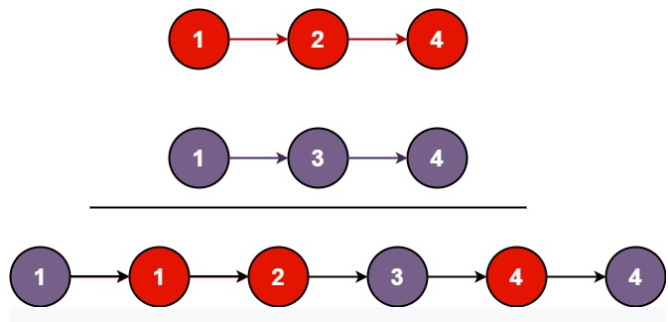

In [195]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

In [ ]:
def mergeTwoLists(l1, l2):
    
    dummy = curr = ListNode(0)

    # Only when l1, l2 are both left, need to compare and extend
    while l1 and l2:
        if l1.val < l2.val:
            curr.next = l1
            l1, curr = l1.next, curr.next
        else:
            curr.next = l2
            l2, curr = l2.next, curr.next

    # if one list is over but another list not yet
    # just link up the rest of the list
    curr.next = l1 or l2
    return dummy.next
    

# 23 Merge k sorted lists

In [293]:
l1 =ListNode(1,ListNode(4,ListNode(5)))
l2 =ListNode(1,ListNode(3,ListNode(4)))
l3 =ListNode(2,ListNode(6))
lists = [l1,l2,l3]

In [286]:
def mergeKLists(lists):
    dummy = curr =ListNode(0)
    #from list pool, select the min val
    # how to record the nums and which list to extend
    
    # while still has list node in lists
#     print(dummy.val)
    while lists:
        # each around
        tmp_min = float("inf")
        record = 0
        for i in range(len(lists)):
            # If such list node hasn't come to end
            if lists[i]:
                if lists[i].val < tmp_min:
                    tmp_min = lists[i].val
                    record = i
        if tmp_min == float('inf'):
            break
        curr.next = lists[record]
        curr, lists[record] = curr.next ,lists[record].next
    return dummy.next
        

In [298]:
from operator import attrgetter

def mergeKLists_use_operator(lists):
    
    sorted_list = []
    # store all nodes into sorted_list
    for head in lists:
        curr = head
        while curr is not None:
            sorted_list.append(curr)
            curr = curr.next
    # use buiult library to sort the list
    sorted_list = sorted(sorted_list, key=attrgetter('val'))
    
    # link the already sorted list
    for i, node in enumerate(sorted_list):
        try:
            node.next = sorted_list[i+1]
        except:
            node.next = None
            
    if sorted_list:
        return sorted_list[0]
    else:
        return None


In [1]:
# l = mergeKLists_use_operator(lists)
# l = mergeKLists(lists)
# l = mergeKLists_Python3(lists)

# <a href = "https://www.youtube.com/watch?v=vbM41Zql228&ab_channel=NickWhite">402 Remove K Digits</a>  
Algo started from 5:42

KEY idea: use stack, greedy, when ecncounter a decreasing number, pop the stack and replace

1 4 3 2 2 1 9:  
1  
1 4  
1 4 3  
Note: 4 >3 ,so replace 4 to 3   
1 3  
1 3 2  
Note 3 > 2, replace 3 to 2  
1 2 2  
1 2 2 1  
Note 2 >1, replace 2 to 1  
1 2 1 9  

In [58]:
num = "1432219";k = 3
# num = "10200";k = 1
# num = "10001";k = 4
# num = "4321"; k = 2

In [59]:
def removeKdigits_brute(num, k):
    # Brute Force, doable, time expire
    # O(n*k)
    if k >= len(num):
        return "0"
    
    while k > 0:
        tmp_min = float('inf')
        for i in range(len(num)):
            curr = num[:i] + num[i+1 :]
            if curr == '':
                return "0"
            else:
                curr = int(curr)
            if curr < tmp_min:
                tmp_min = curr
        num = str(tmp_min)
        k -=1 
    print(num)
    

In [62]:
def removeKdigits(num, k):
    if k >= len(num):
        return '0'
    stack = []
    for n in num:
        # KEY, this while implement algo,
        # 1, if stack not empty
        # 2, if the last element in stack(previous stored) > n
        # means find the decreasing element, need to replace(first pop, then append)
        # 3, if k > 0
        stack = []
        
        for n in num:
            while(stack and int(stack[-1]) > int(n) and k):
                # each find an decreasing element need to replace
                stack.pop()
                k -=1
            stack.append(n)
        
        # If no elements are removed, pop last elements, (increasing order)
        while k:
            stack.pop()
            k-=1
        
        # remove leading zeros
        i = 0
        while i < len(stack) and stack[i]=='0':
            i +=1
            
        return ''.join(stack[i:]) if (len(stack[i:]) > 0) else "0" 
        

    

In [63]:
removeKdigits(num, k)

'1219'

idea: each round try each digit, than compare, than store it to next round.
than move on to next ditgit

In [54]:
''.join(stack)

'21'

In [28]:
num = "1"
for i in range(len(num)):
    curr = num[:i] + num[i+1:] 
    print(curr == '')

True


# <a href='https://www.youtube.com/watch?v=3ZDZ-N0EPV0&ab_channel=TusharRoy-CodingMadeSimple'> 44,  Wildcard Matching</a>  
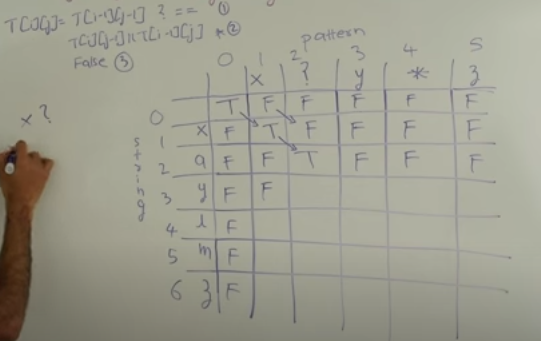

Recursive, i --> index in string, j --> index in pattern
i,j 
if p[j] == '*'


dp[i][j] 表示 在s[:i] 裡面的字串有沒有 符合 p[:j] 的pattern  
<br>

    dp[i][j] == 1, dp[i-1][j-1] if s[i] == p[j] or p[j] =='?'
                2, dp[i-1][j] or dp[i][j-1] of p[j] == '*'
                3, else false

First case --> if p[j] = '?', 表示下一個s的下一個是誰都可以, 所以T[i-1][j-1]

Second case --> if p[j] = '*', dp[i][j-1] 這裡的 * 是對應到 0 sequence string, dp[i-1][j] 這裡的 * 是對應 s[i]  
KEY: 現在是以DP來思考, 只要看前一步

else dp[i][j] == False

In [62]:
s = "xaylmsadfz"; p = "x?y*z"

In [63]:
def isMatch(s, p):
    p_len = len(p)
    s_len = len(s)
    dp = [[False] * (p_len+1) for _ in range(s_len+1)]
    
    # Handle base case
    dp[0][0] = True # empty patter match empty string so true
    
    # Empty string  match all pattern
    for i in range(1, p_len+1):
        dp[0][i]= dp[0][i-1] if p[i-1] == '*' else False
#         print(i, p[i-1])
    
    # Empty pattern match string
    for i in range(1, s_len+1):
        dp[i][0] = False
        
#     for l in dp:
#         print(l)
    for i in range(1, s_len +1):
        for j in range(1, p_len+1):
            # since our matrix has extra row/col,
            # the i,j index won't match original index
            p_index = j-1
            s_index = i-1
            if p[p_index] == '?' or p[p_index] == s[s_index]:
                dp[i][j] = dp[i-1][j-1]
            elif p[p_index] =='*':
                dp[i][j] = dp[i-1][j] or dp[i][j-1]
            else:
                dp[i][j] = False
                
    for l in dp:
        print(l)
        
    return dp[-1][-1]
                
            
    

    

In [64]:
isMatch(s,p)

[True, False, False, False, False, False]
[False, True, False, False, False, False]
[False, False, True, False, False, False]
[False, False, False, True, True, False]
[False, False, False, False, True, False]
[False, False, False, False, True, False]
[False, False, False, False, True, False]
[False, False, False, False, True, False]
[False, False, False, False, True, False]
[False, False, False, False, True, False]
[False, False, False, False, True, True]


True

# 10 Regular Expression Matching

In [118]:
def isMatch(s, p):
    
    p_len = len(p)
    s_len = len(s)
    dp = [[False] * (p_len+1) for _ in range(s_len+1)]
    
    # Handle base case
    dp[0][0] = True # empty patter match empty string so true
#     for l in dp:
#         print(l)
    # Empty string  match all pattern
    for i in range(1, p_len+1):
#         print(dp[0][i])
#         print(p[i-1])
        if p[i-1] =='*':
            dp[0][i] = dp[0][i-2]
#             print('sdf')
#     for l in dp:
#         print(l)
#     Empty pattern match string
    for i in range(1, s_len+1):
        dp[i][0] = False
        

    for i in range(1, s_len +1):
        for j in range(1, p_len+1):
            # since our matrix has extra row/col,
            # the i,j index won't match original index
            p_index = j-1
            s_index = i-1
            if p[p_index] == '.' or p[p_index] == s[s_index]:
                dp[i][j] = dp[i-1][j-1]
            elif p[p_index] =='*':
                tmp = False
                # dp[i-1][j] 表示 可以抵銷掉一個 string 的 bit
                # dp[i][j-2] 則表示 這個* 根本沒有抵銷到 string bit, key 也要掠過前一個 pattern bit
                # 要可以抵銷一個string bit  就要看 * 前一個 是不適跟 string bit依樣
                if p[p_index -1] == s[s_index] or p[p_index -1 ]=='.':
                    tmp = dp[i-1][j]
                dp[i][j] = tmp or dp[i][j-2]
            else:
                dp[i][j] = False
                
    for l in dp:
        print(l)
        
    return dp[-1][-1]
                
    

In [119]:
# s = "xaylmz"; p = "x.y*z"
# s = "xayyz"; p = "x.y*z"
s= "mississippi"; p = "mis*is*p*."
# s = 'aab'; p = 'c*a*b'
# s = 'aaa'; p = 'ab*ac*a'



In [120]:
isMatch(s, p)

[True, False, False, False, False, False, False, False, False, False, False]
[False, True, False, False, False, False, False, False, False, False, False]
[False, False, True, False, True, False, False, False, False, False, False]
[False, False, False, True, True, False, False, False, False, False, False]
[False, False, False, False, True, False, False, False, False, False, False]
[False, False, False, False, False, True, False, True, False, True, False]
[False, False, False, False, False, False, True, True, False, True, True]
[False, False, False, False, False, False, False, True, False, True, True]
[False, False, False, False, False, False, False, False, False, False, True]
[False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False]


False

# 1305. All Elements in Two Binary Search Trees


In [ ]:
def getAllElements(root1, root2):
    l1,l2 = [], []
    res = []
    def dfs(node, tree):
        if node:
            dfs(node.left,tree)
            # print(node.val)
            if tree == 1:
                l1.append(node.val)
            else:
                l2.append(node.val)
            dfs(node.right,tree)

    dfs(root1,1)
    dfs(root2,2)

    while l1 or l2:
        if not l1:
            res.append(l2.pop(0))
        elif not l2:
            res.append(l1.pop(0))
        else:
            res.append(l1.pop(0) if l2[0]>l1[0] else l2.pop(0))
    return res



In [ ]:
def getAllElements(root1, root2):
    l = []
    def dfs(node):
        if node:
            dfs(node.left)
            # print(node.val)
            l.append(node.val)
            dfs(node.right)

    dfs(root1)
    dfs(root2)

    return sorted(l)

# 1464 Maximum Product of Two Elements in an Array

In [20]:
# nums = [3,4,5,2,5]
nums = [1,1]

In [21]:
def maxProduct(nums):
    f_max = max(nums)
    f_index = nums.index(f_max)
    print(f_max)
    print(f_index)
    s_max = max(nums[:f_index] + nums[f_index+1:])
    print(s_max)
    return (f_max -1) * (s_max-1)

In [22]:
maxProduct(nums)

1
0
1


0

# <a href='https://leetcode.com/problems/palindrome-linked-list/discuss/64500/11-lines-12-with-restore-O(n)-time-O(1)-space'>234. Palindrome Linked List</a>


In [23]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next


In [143]:
head = ListNode(1, ListNode(2,ListNode(3,ListNode(1))))

In [144]:
def isPalindrome(head):
    # how to store the last element
    # NOTE: KEY, since fast pointer is twice as faster as sloe
    # when fast pointer reach end means, slow is at the middle
    
    # rev records the first half, need to set the same structure as fast, slow, hence later we have rev.next
    rev = None
    slow = fast = head
    
    while fast and fast.next:
        # KEY, 這樣的設計, when break if fast  is not None, means only odds number element
        # if even number , fast will be None
        fast = fast.next.next
        # 到最後 rev 會是 revers_list 的 head 
        rev, rev.next, slow = slow, rev, slow.next

    # means odd number element list
    if fast:
        slow = slow.next
        
    # key need to pay attention when one of them become null 
    while rev and slow.val == rev.val:
        slow = slow.next
        rev = rev.next
        
    # if equivalent then rev become None, return True; otherwise return False 
    return not rev

        
        

In [145]:
def isPalindrome_list(head):
    # Use list (May not legal)
    e_list = []
    while head:
        e_list.append(head.val)
        head = head.next
    print(e_list)
    r_list = list(reversed(e_list)) 
    print(r_list)
    
    return e_list == r_list
    

    

In [146]:
isPalindrome(head)

1


False

# <a href='https://www.https//media.geeksforgeeks.org/wp-content/cdn-uploads/RGIF2.gifyoutube.com/watch?v=3wa9fa4IhOU&ab_channel=%E5%82%85%E7%A0%81%E7%88%B7'>143. Reorder List</a>
KEY 解題邏輯:  
1, 找到中間點  
2, 找到中間點後, 將list 分成兩部分, 將後半部分的linked list reverse  
3, 將前半部分的list 跟 反轉的list merge  



## reverse linked_list:
![Alt Text](https://media.geeksforgeeks.org/wp-content/cdn-uploads/RGIF2.gif)

In [251]:
def reverse_list(head):
    prev_node = None
    while head:
        nxt = head.next
        head.next = prev_node
        prev_node = head
        head = nxt
    return prev_node

head = ListNode(1, ListNode(2,ListNode(3,ListNode(4,ListNode(5)))))
l = reverse_list(head)
while l:
    print(l.val)
    l = l.next

## Alternative_Merge_lists

In [285]:
def cross_merge_two_list(head1, head2):
    # head2 must shorter
    dummy = head1
    while head2 and head1:
        # store the head2.next
        tmp = head2.next
        # 注意, 最後head2 會是 tmp, 所以需要地方存原本的 head1
        head2.next = head1.next
        # linke the other
        head1.next = head2
        head1 = head1.next.next
        # 注意, 最後head2 會是 tmp
        head2 = tmp

    return dummy, head2
    

In [287]:
head2 = ListNode(6, ListNode(5,ListNode(4,ListNode(3))))
head1 = ListNode(1, ListNode(2))
l, remaining = cross_merge_two_list(head1, head2)
while l:
    print(l.val)
    l = l.next

print('*')
while remaining:
    print(remaining.val)
    remaining = remaining.next


1
6
2
5
*
4
3


In [272]:
def reorderList(head):
    if not head:
        return
    ## Find the middle point
    fast ,slow = head.next ,head
    while fast and fast.next:
        fast = fast.next.next
        slow = slow.next
        
    ## reverse second half
    #  print(slow.val)
    p = slow.next
    # 切斷原本的linked list
    # KEY 要切斷, 不然會有loop

    slow.next = None
    prev_node = None 
    
    while p:
        #先記錄下原本的 next
        nxt = p.next
        # 把原本往後的往前指
        p.next = prev_node
        # 更新prev_node(往右走) 
        prev_node = p
        # 更新 p
        p = nxt
    # KEY, now p is None, and prev_node is the head of reversed list
    
    ## Merge the head part and prev_node part
    while prev_node:
        # 先將prev_node.next 存起來
        tmp = prev_node.next
        prev_node.next = head.next
        # 連起head的下一個要是 reverse
        head.next = prev_node
        head = head.next.next # 往後走兩格, 代表已經做完
        prev_node = tmp
        

    


In [273]:
head = ListNode(1, ListNode(2,ListNode(3,ListNode(4,ListNode(5)))))

# 392 Is Subsequence

In [27]:
# s= "abc"; t="ahbgdc"

# s= "acb"; t="ahbgdc"
# s= "aaaaaa"; t ="bbaaaa"

# s = 'b'; t='abc'
s= "twn"; t= "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxtxxxxxxxxxxxxxxxxxxxxwxxxxxxxxxxxxxxxxxxxxxxxxxn"

In [28]:
s in t

False

In [29]:
def isSubsequence(s, t):
    if not s or s in t:
        return True
    if s[0] not in t:
        return False
    
    idx = 0
    
    for char in s:
        print(char, t[idx:])
        if char in t[idx:]:
            idx += t[idx:].index(char)+1
        else:
            return False
    return True
            
        

        
    
    
        

In [30]:
isSubsequence(s,t)

t xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxtxxxxxxxxxxxxxxxxxxxxwxxxxxxxxxxxxxxxxxxxxxxxxxn
w xxxxxxxxxxxxxxxxxxxxwxxxxxxxxxxxxxxxxxxxxxxxxxn
n xxxxxxxxxxxxxxxxxxxxxxxxxn


True

In [388]:
'b' in 'sdfg'[5:]

False

# 746. Min Cost Climbing Stairs

In [44]:
# cost = [1,100,1,1,1,100,1,1,100,1]
cost = [10,15,20]

In [45]:
def minCostClimbingStairs(cost):
    dp = [cost[i] for i in range(len(cost))]
    dp[0] = cost[0]
    dp[1] = cost[1]
    
    for i in range(2, len(cost)):
        dp[i] += min(dp[i-1], dp[i-2])
    
    print(min(dp[-1], dp[-2]))
    return dp

In [46]:
minCostClimbingStairs(cost)

15


[10, 15, 30]

# 148 Sort list
**KEY NOTE: 解題方法**  
先找到list的中間點, 分為前半跟後半段,  然後recursive 對前進行 sortlist, 
split 到最後再 對每個 element merge, 最後會取的兩個 sorted的list, 最後在merge two sorted list
Ex, -1,5,3,4,0
head = -1,5
slow = 3,4,0
m(split(head), split(slow))
1:
split(head);
head = -1
slow = 5
<!-- -1 跟 5進去後會回傳 base case, merge -1 跟 5 -->
m(split(head), split(slow))
return -1,5

2:
split(slow);
head = 3
slow = 4,0
m(split(head), split(slow))

2-1:
split(head) ==>3

split(slow):
head = 4
slow = 0
m(split(head), split(slow))
return 0,4

2-2
m(3, 0,4)
return 0,3,4






In [1]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

In [83]:
head = ListNode(-1, ListNode(5,ListNode(3,ListNode(4,ListNode(0)))))


In [84]:
def sortList(head):

    def split_merge(head):
        if not head or not head.next:
            return head
        
        p, fast, slow = None, head, head
        while fast and fast.next:
            p = slow
            fast = fast.next.next
            slow = slow.next
        # p is one node before mid point
        # Need to cut the linked list
        p.next = None
        
#         print(head.val)
#         print(slow.val)
#         print('**')
        return merge(split_merge(head), split_merge(slow))
        
    def merge(h1, h2):
        dummy = ListNode(0)
        curr = dummy
        while h1 and h2:
            if h1.val < h2.val:
                curr.next = h1
                h1 = h1.next
            else:
                curr.next = h2
                h2 = h2.next
            curr = curr.next
        curr.next = h1 or h2
        return dummy.next
    
    return split_merge(head)

In [85]:
h1 = sortList(head)
while h1:
    print(h1.val)
    h1 = h1.next


-1
0
3
4
5


In [ ]:
def sortList_List(head):
    l = []

    while head:
        l.append(head.val)
        head = head.next

    l = sorted(l)
    print(l)

    dummy = node = ListNode(0)
    for i in range(len(l)):
        # print(l[i])
        node.next = ListNode(l[i])
        node = node.next

    return dummy.next

# <a hraf='https://leetcode.com/problems/rotate-list/discuss/348197/96-faster-Simple-python-solution-with-explanation'>61. Rotate List</a>


In [190]:
def rotateRight(head, k):
    if k ==0:
        return head
    curr = head
    count = 0
    while curr and curr.next:
        count +=1
        curr = curr.next
    curr.next = head
    length = count +1
#     count +=1
    k = k % length
    
    print('step',length - k -1)
    for _ in range(length - k -1):
        head = head.next
    p = head.next
    head.next = None
    return p
    
    


In [192]:
# head = ListNode(1, ListNode(2,ListNode(3,ListNode(4,ListNode(5)))))
head = ListNode(0, ListNode(1,ListNode(2)))
h1 = rotateRight(head,3)
while h1:
    print(h1.val)
    h1 = h1.next

step 2
0
1
2


# 86. Partition List
**解題邏輯**  

當遇到每個node, 判斷有沒有大於 x, 若是小於x, 擇要記錄當前位置, 並且等之後有遇到小於x的node要將其接起來

In [214]:
def partition(head, x):
    dummy = ListNode(0)
    prev = left = dummy 
    dummy.next = curr = head
    while curr:
        # KEY if left == prev,11:10,代表只要單純移動curr跟 prev
        # 不用作插入node的動作
        if prev == left:
            if curr.val < x:
                left = left.next
            prev = curr
            curr = curr.next
        else:
            if curr.val < x:
                prev.next = curr.next
                curr.next = left.next
                left.next = curr
                left = left.next
                curr = prev.next
            else:
                prev = curr
                curr = curr.next
    
    return head

In [215]:
head = ListNode(1, ListNode(2,ListNode(4,ListNode(3,ListNode(2,ListNode(5))))))
h1 = partition(head,3)
while h1:
    print(h1.val)
    h1 = h1.next

1
2
2
4
3
5


## 147. Insertion Sort List O(n^2)
<a href="https://leetcode.com/problems/insertion-sort-list/discuss/46432/AC-Python-192ms-solution">Implementation faster veresion</a>


In [4]:
head_test = ListNode(-1)


In [35]:
def insertionSortList(head):
    if not head:
        return 
    
    if not head.next:
        return head
    
    dummy = ListNode(0)
    dummy.next = sorted_p = unsorted_prev = head
    unsorted_p = head.next
    
    while unsorted_p:
        # each iterate is for another unsorted_p
        print('*',unsorted_p.val)
        sorted_prev = dummy
        sorted_p = dummy.next
        while sorted_p != unsorted_p:
            print('-',sorted_p.val)
            # find the correct position for the unsrted element
            if unsorted_p.val >= sorted_p.val and unsorted_p.val < sorted_p.next.val:
                tmp = sorted_p.next
                unsorted_prev.next = unsorted_p.next
                sorted_p.next = unsorted_p
                unsorted_p.next = tmp
                
                unsorted_p = unsorted_prev.next
                break

            elif unsorted_p.val < sorted_p.val:
                unsorted_prev.next = unsorted_p.next
                unsorted_p.next = sorted_p
                sorted_prev.next = unsorted_p
                
                unsorted_p = unsorted_prev.next
                break
            # mean unsorted >= sorted , also > sorted.next
            else:
                sorted_prev = sorted_p
                sorted_p = sorted_p.next        
        if sorted_p == unsorted_p:
            unsorted_prev = unsorted_p
            unsorted_p = unsorted_p.next
            
    return dummy.next
    


In [37]:
head = ListNode(-1, ListNode(5,ListNode(3,ListNode(4,ListNode(0,ListNode(2))))))
# head = ListNode(4, ListNode(2,ListNode(1,ListNode(3,ListNode(0,ListNode(2))))))

h = insertionSortList(head)
while h:
    print(h.val)
    h = h.next

* 5
- -1
* 3
- -1
* 4
- -1
- 3
* 0
- -1
* 2
- -1
- 0
-1
0
2
3
4
5
